# A Classification Based approach for predicting Smartphone Price Categories

### Raihan Uddin `B2430070`
### Sayan Das `B2430035`

## Importing Libraries

In [513]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

## Importing Dataset

In [514]:
path="https://raw.githubusercontent.com/SayanDasDev/mobile_price_prediction/refs/heads/main/data/data_mobile_price_range.csv"
df=pd.read_csv(path)
df.head(10) 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [515]:
# DIMENSION OF THE DATASET
df.shape

(2000, 21)

In [516]:
# DATASETS VARIABLE OR FEATURES
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## Dataset Description

In [517]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [518]:
print("BASIC STATSTICS OF THE DATASET:")
df.describe().T

BASIC STATSTICS OF THE DATASET:


,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


Visualizing distribution of all input features

  0%|          | 0/21 [00:00<?, ?it/s]

100%|██████████| 21/21 [00:01<00:00, 20.85it/s]


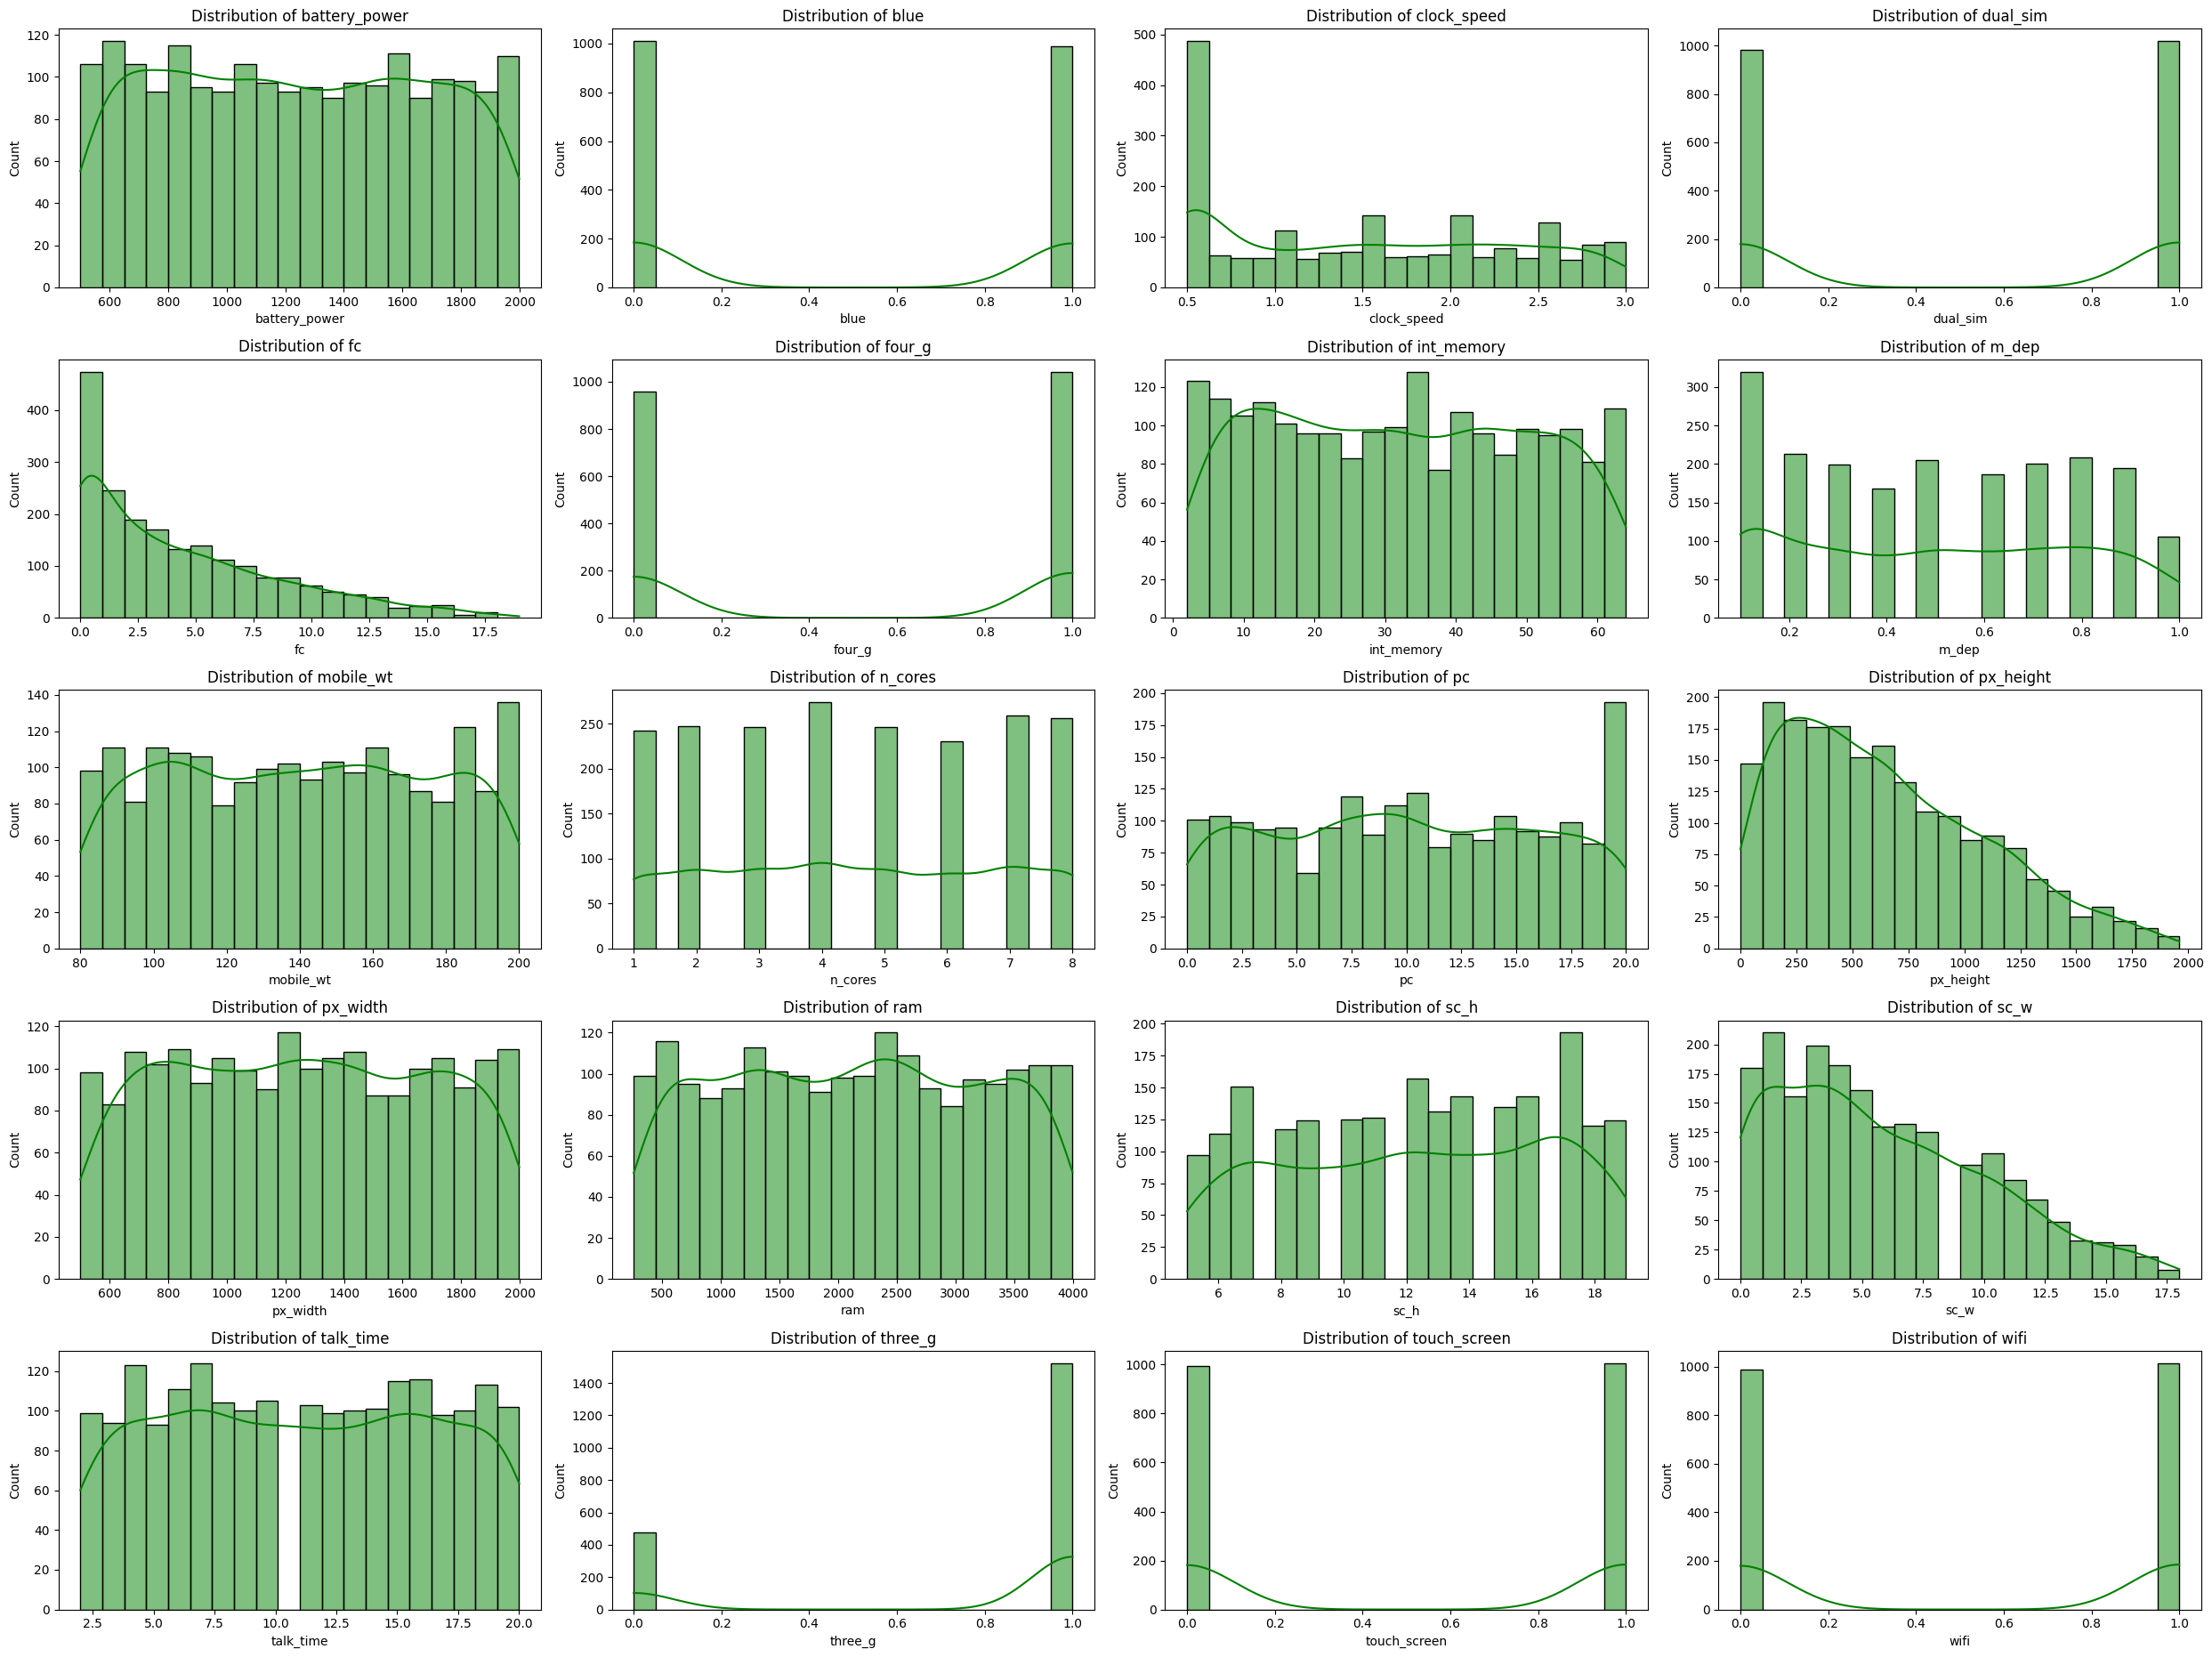

In [519]:
row = 6
col = 4
plt.figure(figsize=(25,22))
count = 1
for feature in tqdm(df.columns):
    if feature == 'price_range':
        continue
    plt.subplot(row, col, count) 
    sns.histplot(df[feature], bins=20, kde=True, color='g')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Count')
    count += 1

plt.tight_layout()
plt.show()

This visualization give us insight into the distributions of the features. An important observation here is that px_height can be normalized. Most of the categorical features are balanced except three_g.

## Handling missing values

In [520]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

As we can see there is no missing value.

## Handling duplicate values

In [521]:
df.duplicated().sum()

np.int64(0)

As we can see there is no duplicate values

## Listing unique values for each columns


In [522]:
features_list = df.columns.tolist() 
for feature in features_list:
    print(f"UNIQUE VALUE IN {feature}:")
    print(df[feature].unique())
    print("\n")



UNIQUE VALUE IN battery_power:
[ 842 1021  563 ... 1139 1467  858]


UNIQUE VALUE IN blue:
[0 1]


UNIQUE VALUE IN clock_speed:
[2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]


UNIQUE VALUE IN dual_sim:
[0 1]


UNIQUE VALUE IN fc:
[ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]


UNIQUE VALUE IN four_g:
[0 1]


UNIQUE VALUE IN int_memory:
[ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]


UNIQUE VALUE IN m_dep:
[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]


UNIQUE VALUE IN mobile_wt:
[188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89

## Handling Invalid Values

Checking for any negative values present

In [523]:
negative_counts = df.apply(lambda x: (x < 0).sum())
print(negative_counts)

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


We can see no negative values are there.

Checking for zero values present

In [524]:
zero_counts = df.apply(lambda x: (x == 0).sum())
print(zero_counts)

battery_power       0
blue             1010
clock_speed         0
dual_sim          981
fc                474
four_g            957
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                101
px_height           2
px_width            0
ram                 0
sc_h                0
sc_w              180
talk_time           0
three_g           477
touch_screen      994
wifi              986
price_range       500
dtype: int64


We can px_height and sc_w are have 2 and 180 zero values respectively. We will replace these zero values with the mean of the respective features.

In [525]:
to_replace_with_mean = ['sc_w', 'px_height']

for feature in to_replace_with_mean:
	df[feature] = df[feature].replace(0, df[feature].mean())

## Outlier Handling

100%|██████████| 21/21 [00:00<00:00, 29.39it/s]


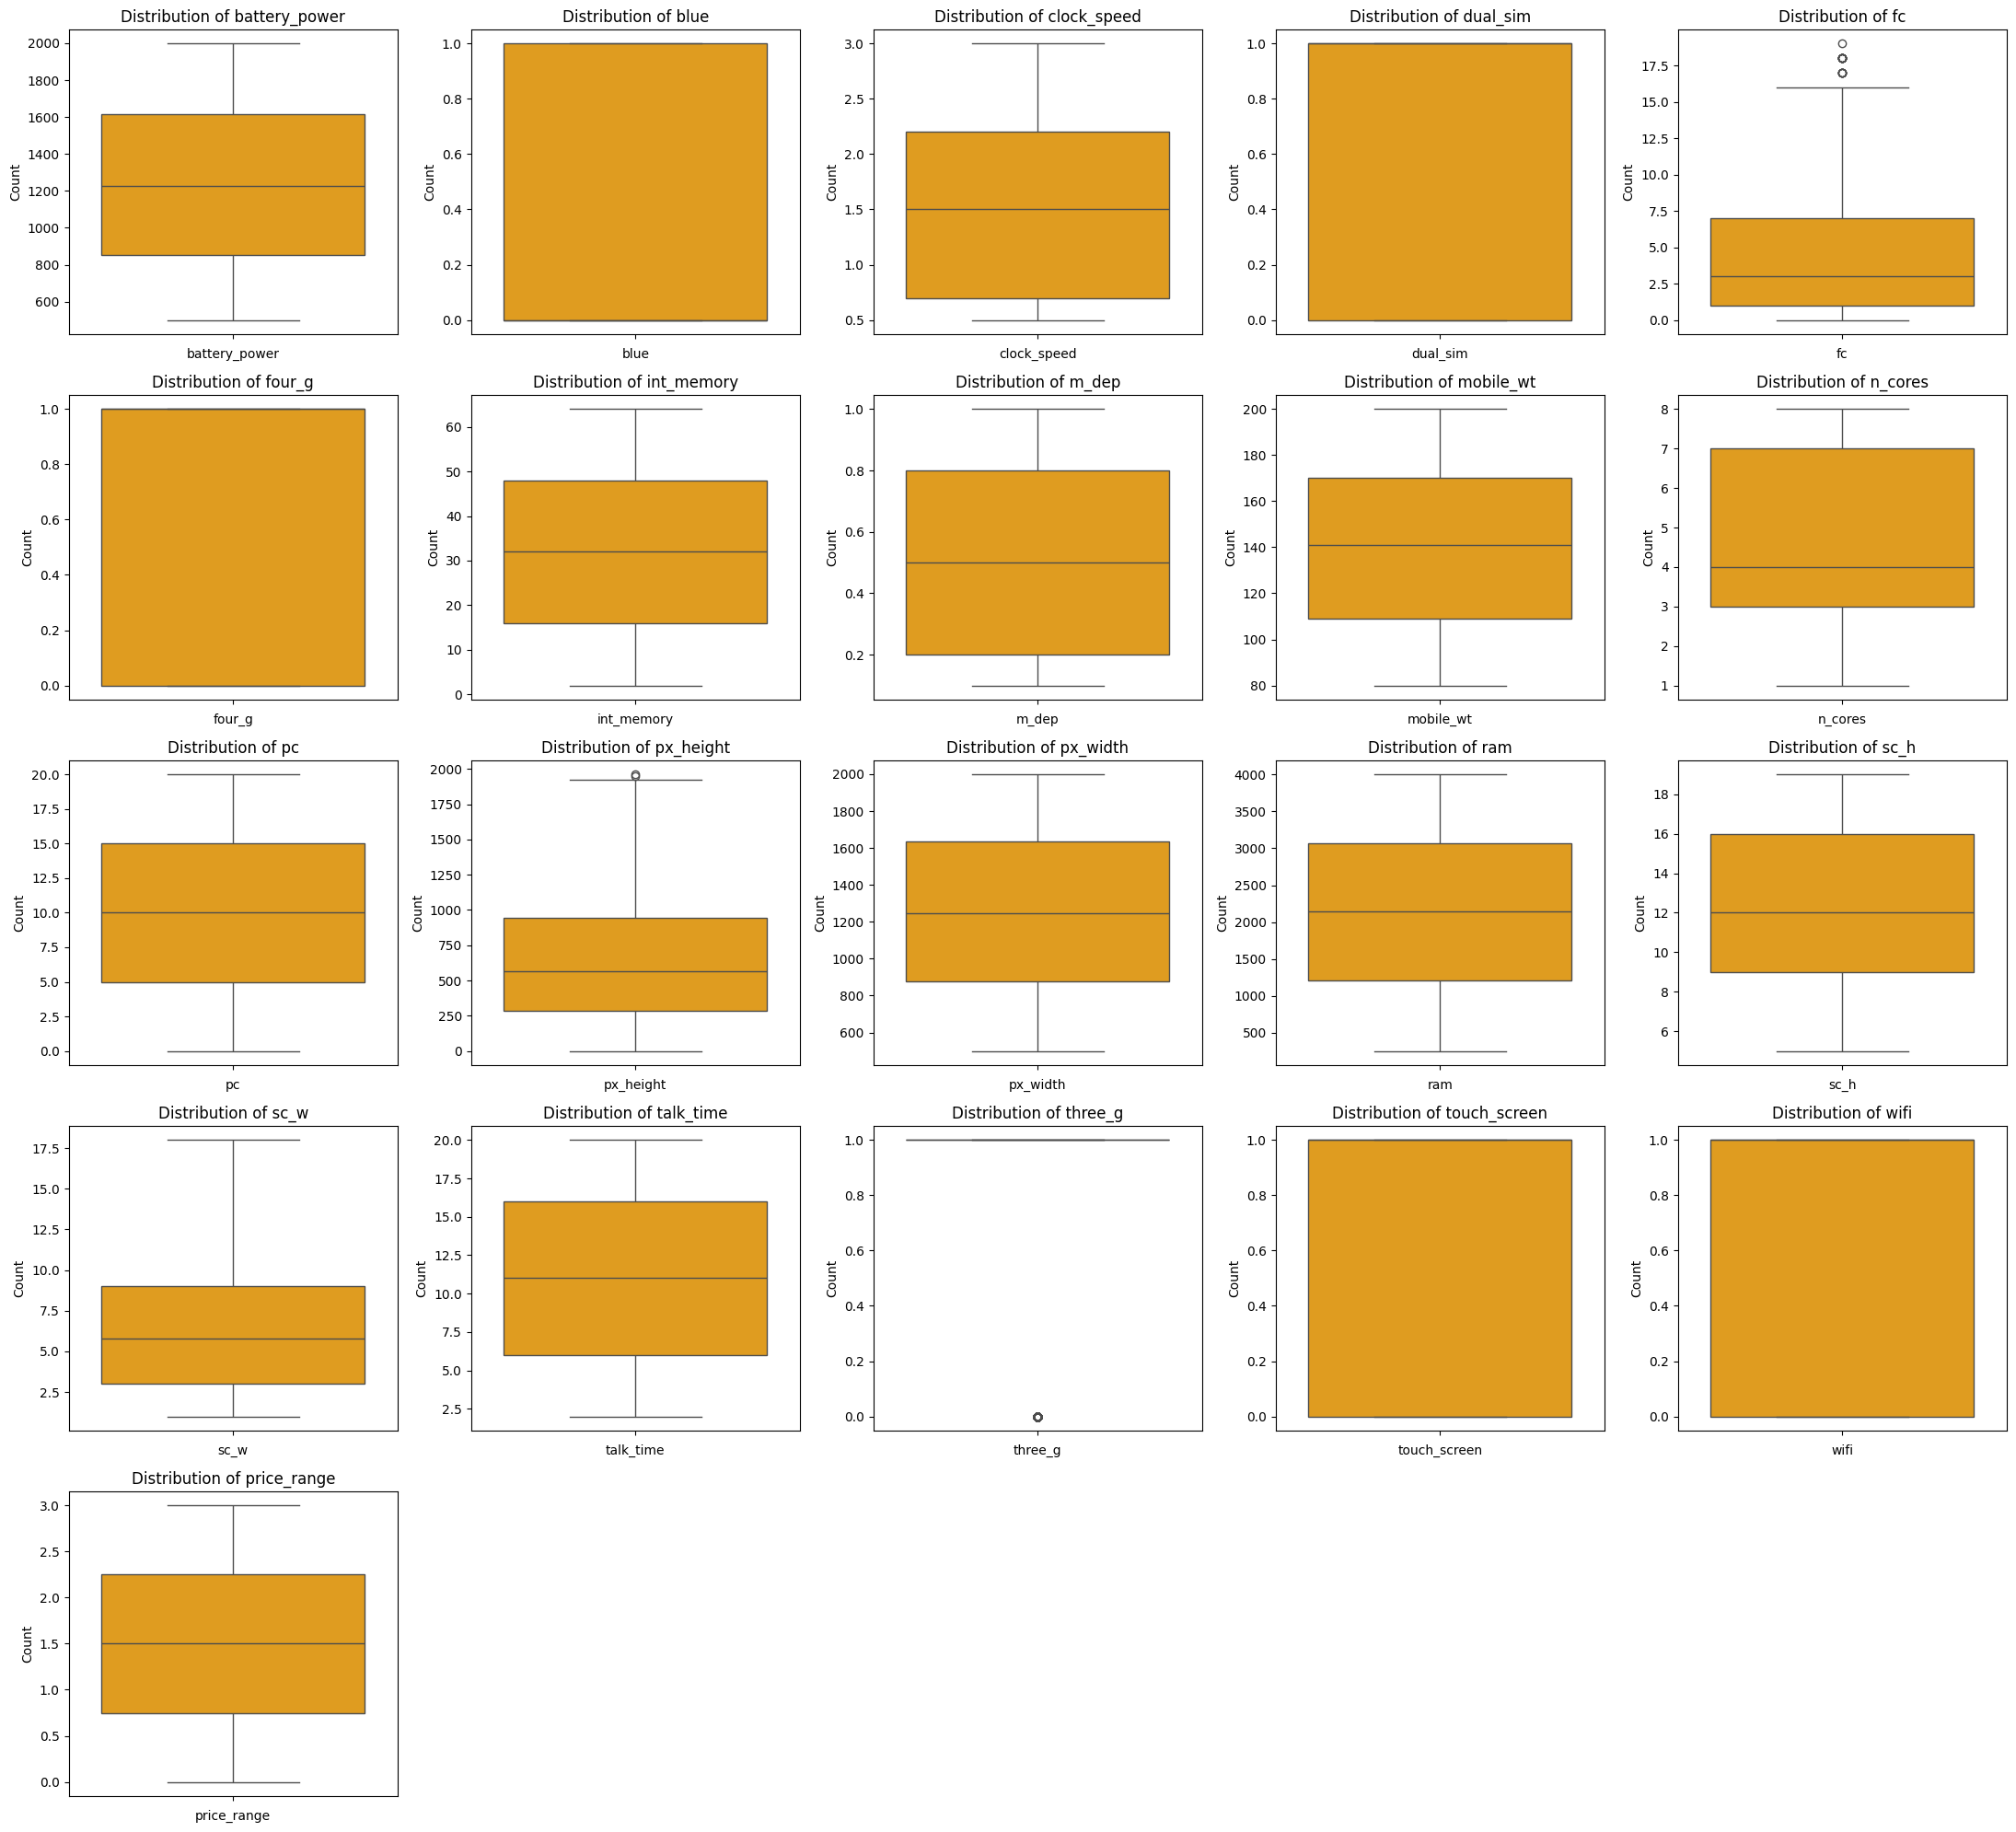

In [526]:
row = 5
col = 5
plt.figure(figsize=(22,20))
count = 1
for feature in tqdm(features_list):
    plt.subplot(row, col, count) 
    sns.boxplot(df[feature],color='orange')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Count')
    count += 1

plt.tight_layout()
plt.show()

We can see outliers in two features, fc and px_height. We shall use the IQR methode to handle them.

In [527]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

df = remove_outliers_iqr(df, 'fc')
df = remove_outliers_iqr(df, 'px_height')

Box-plot after removing outliers

  0%|          | 0/21 [00:00<?, ?it/s]

100%|██████████| 21/21 [00:01<00:00, 16.25it/s]


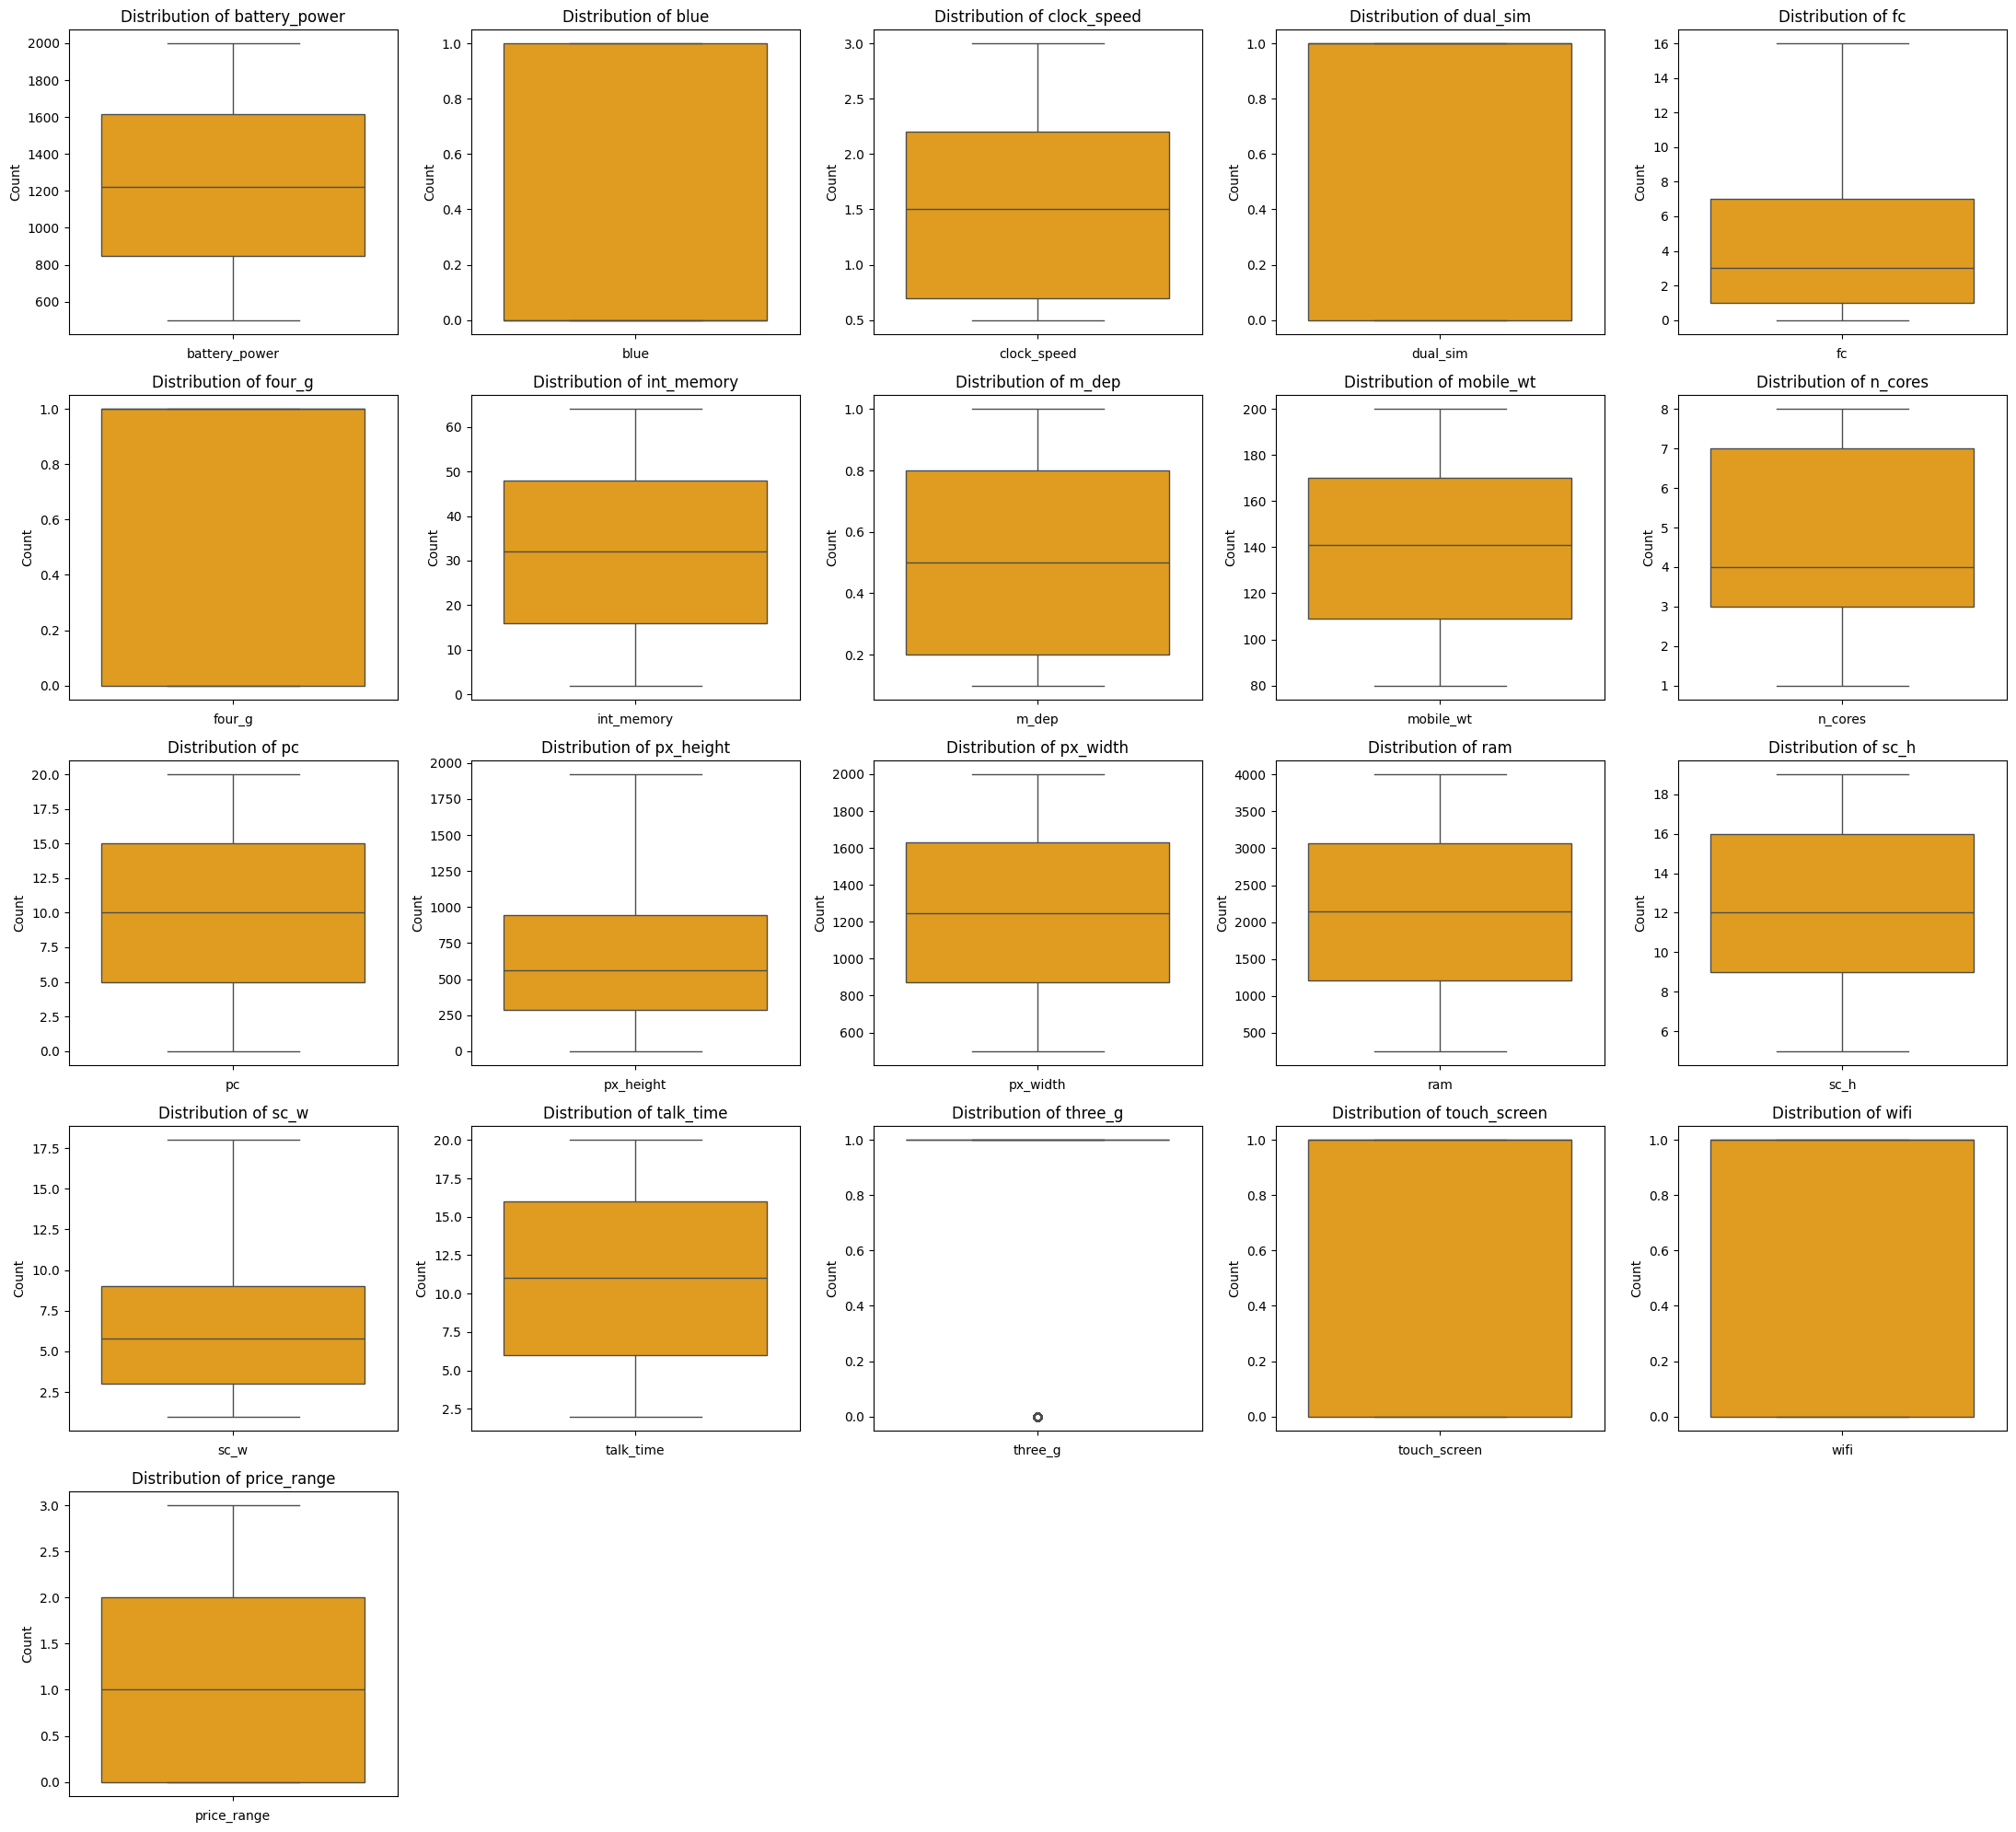

In [528]:
row = 5
col = 5
plt.figure(figsize=(22,20))
count = 1
for feature in tqdm(features_list):
    plt.subplot(row, col, count) 
    sns.boxplot(df[feature],color='orange')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Count')
    count += 1

plt.tight_layout()
plt.show()

## Class Imbalance Check

Text(0, 0.5, 'count')

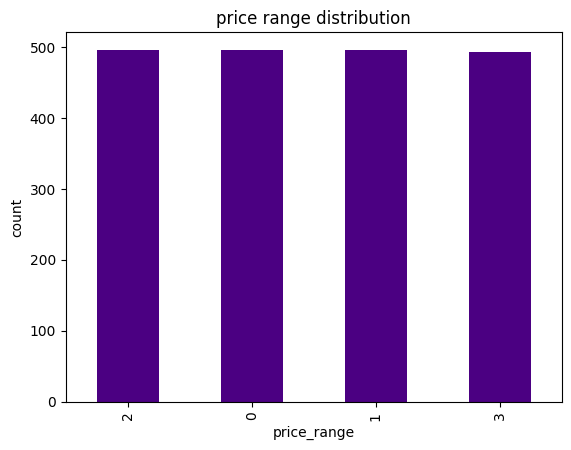

In [529]:
df['price_range'].value_counts().plot(kind='bar',title="price range distribution",color='indigo')
plt.xlabel('price_range')
plt.ylabel('count')

We can see that the dataset is balanced across all four price range categories.

## Correlation Analysis

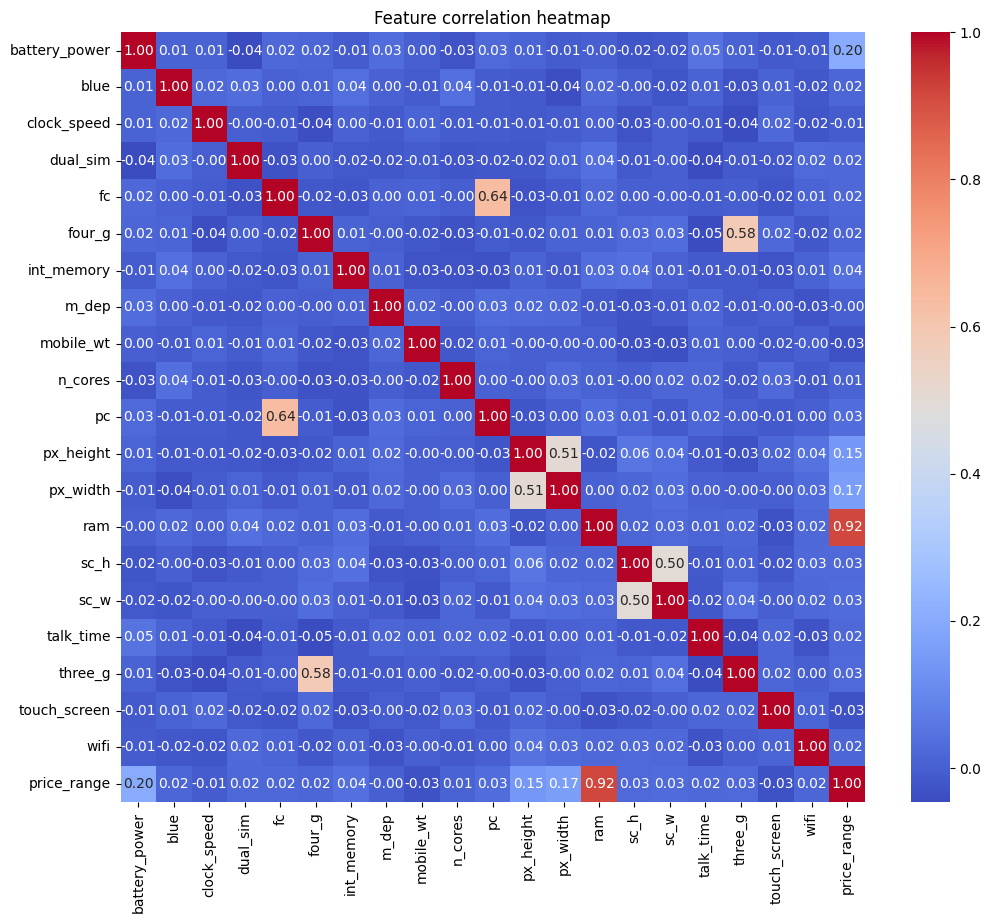

In [530]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature correlation heatmap')
plt.show()

Here we can see that ram is highly correlated with price range. There are some features which are correlated with each other like: 3G and 4G, fc and pc, px_height and px_width, sc_h and sc_w. These correlations will be taken into note during next steps to reduce feature redundancy and improve model performance.

## Feature Engineering

We shall make two new features namely px_area and screen_area by combining px_height, px_width and sc_h, sc_w respectively.

In [531]:
df['px_area'] = df['px_height'] * df['px_width']
df['screen_area'] = df['sc_h'] * df['sc_w']
df=df.drop(['px_height','px_width','sc_h','sc_w'],axis=1)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range,px_area,screen_area
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,19,0,0,1,1,15120.0,63.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,7,1,1,0,2,1799140.0,51.0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,9,1,1,0,2,2167308.0,22.0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,11,1,0,0,2,2171776.0,128.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,15,1,1,0,1,1464096.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,668,19,1,1,0,0,2309580.0,52.0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,2032,16,1,1,1,2,1797975.0,110.0
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,3057,5,1,1,0,3,1416576.0,9.0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,869,19,1,1,1,0,225120.0,180.0


Also we will be dropping three_g and fc columns because they are redundant due to presence of four_g and pc.

In [532]:
df = df.drop(['three_g'], axis=1)
df = df.drop(['fc'], axis=1)

In [533]:
df.shape

(1980, 17)

Correlation matrix after feature engineering

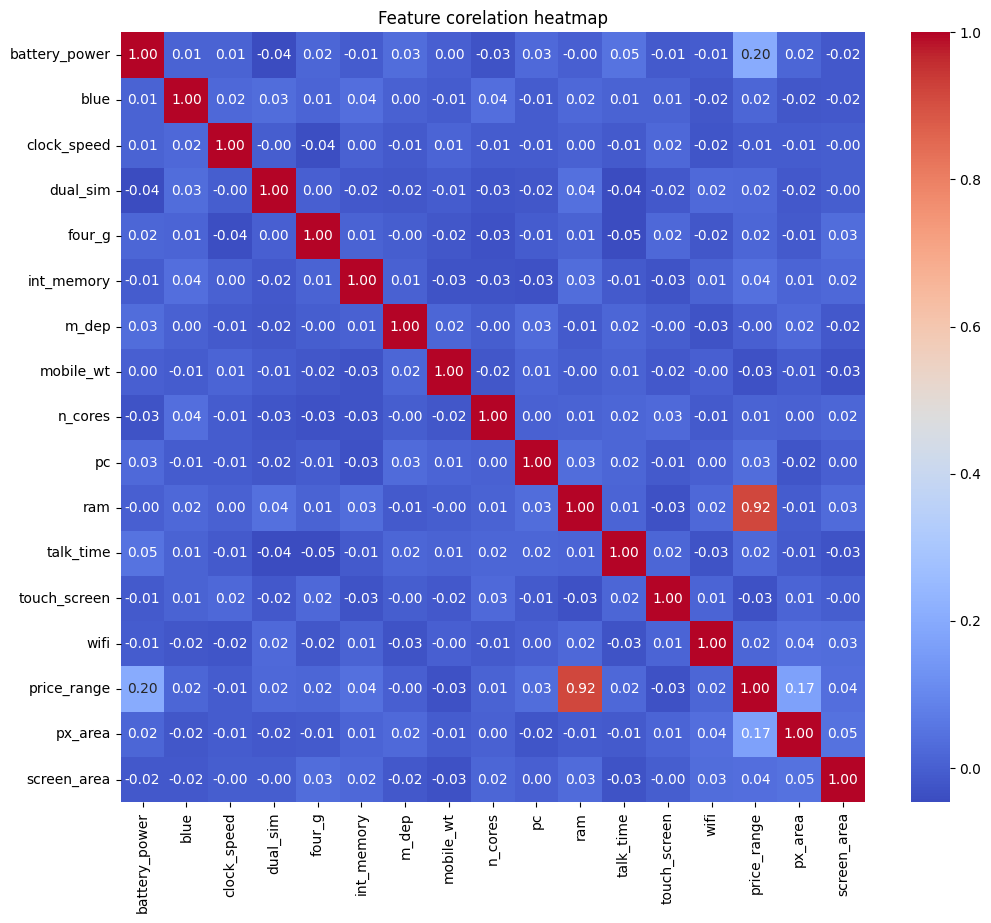

In [534]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Feature corelation heatmap')
plt.show()

## Feature Selection

In [535]:
df_copy = df.copy()

y = df_copy.pop('price_range')
X = df_copy
feature_selector = SelectKBest(f_classif, k='all')  
X_selected = feature_selector.fit_transform(X, y)
p_values = feature_selector.pvalues_
f_scores = feature_selector.scores_

selected_features = X.columns[p_values < 0.1]

print("Selected features based on p-values (p-value < 0.1):")
selected_features_data = []
for feature, p_value, f_score in zip(X.columns, p_values, f_scores):
    if p_value < 0.1:
        selected_features_data.append([feature, p_value, f_score])

selected_features_df = pd.DataFrame(selected_features_data, columns=['Feature', 'P-value', 'F-score'])

print("\nFeatures with p-value < 0.05:")
selected_features_df

Selected features based on p-values (p-value < 0.1):

Features with p-value < 0.05:


,Feature,P-value,F-score
0,battery_power,1.346445e-19,31.029070
1,int_memory,4.565465e-02,2.677198
2,mobile_wt,1.358384e-02,3.568971
3,n_cores,6.889179e-02,2.369076
4,ram,0.000000e+00,3483.086147
5,px_area,4.624302e-16,25.302878
6,screen_area,6.708148e-02,2.389129


## Normalizing the data

In [536]:
X=df[selected_features]
y=df['price_range']
X.head()



,battery_power,int_memory,mobile_wt,n_cores,ram,px_area,screen_area
0,842,7,188,2,2549,15120.0,63.0
1,1021,53,136,3,2631,1799140.0,51.0
2,563,41,145,5,2603,2167308.0,22.0
3,615,10,131,6,2769,2171776.0,128.0
4,1821,44,141,2,1411,1464096.0,16.0


100%|██████████| 7/7 [00:00<00:00,  8.46it/s]


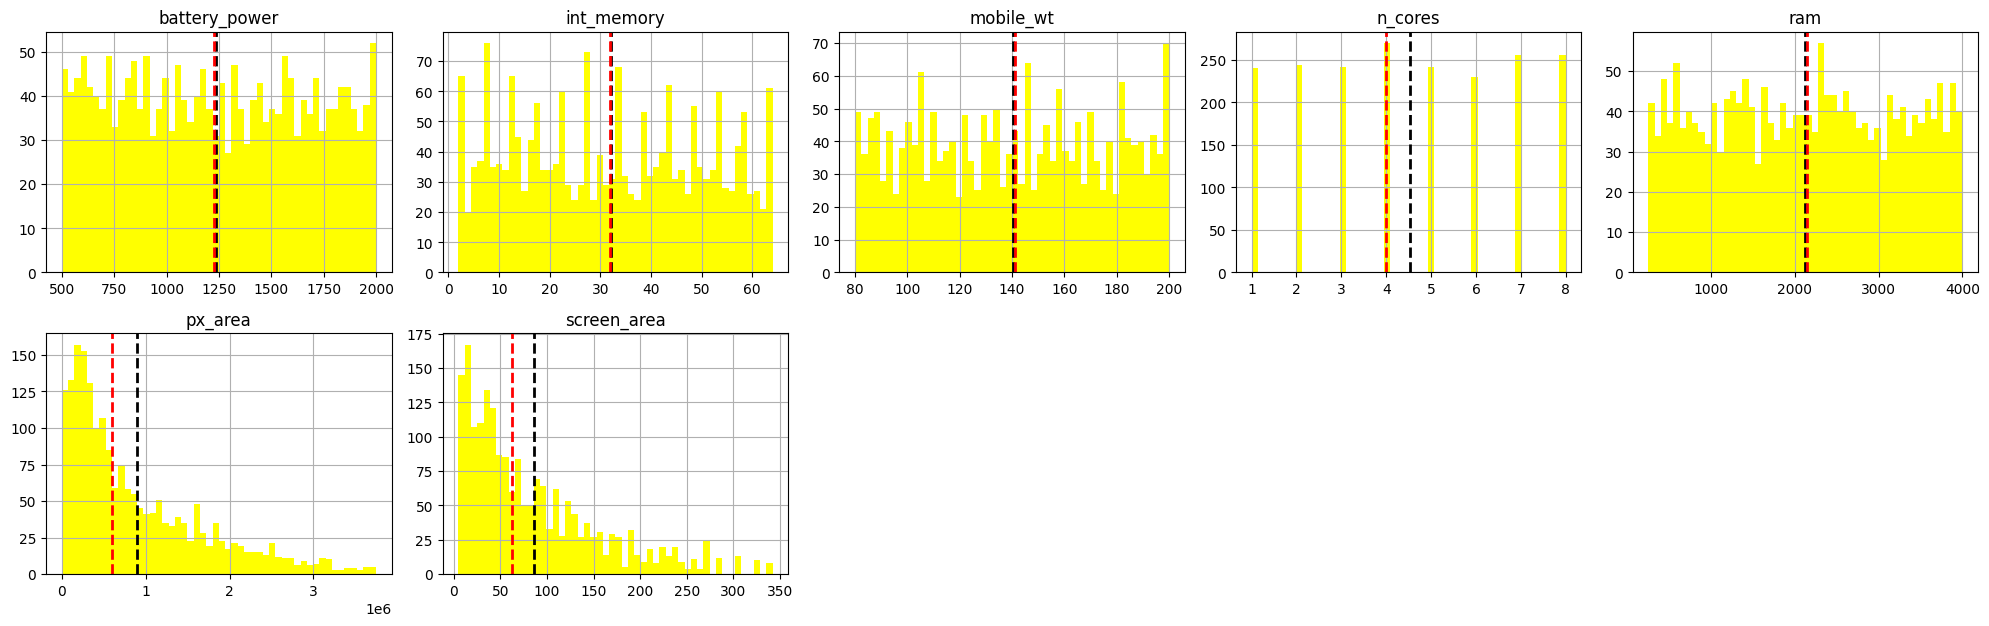

In [537]:
counter=1
fig = plt.figure(figsize=(20,15))
for col in tqdm(X.columns): 
  plt.subplot(5,5,counter)
  ax = fig.gca()
  X[col].hist(bins=50, ax = ax,color='yellow') 
  ax.axvline(X[col].mean(), color = 'black',linestyle='dashed', linewidth=2) 
  ax.axvline(X[col].median(), color = 'red',linestyle='dashed', linewidth=2) 
  ax.set_title(col)
  counter=counter+1
  plt.tight_layout()

here px_area isn not normalized

In [538]:
original_px_area = X['px_area'].copy()
original_screen_area = X['screen_area'].copy()

pt = PowerTransformer(copy=False)
X.loc[:, ['px_area', 'screen_area']] = pt.fit_transform(X[['px_area', 'screen_area']])

the plot of px_area before and after normalization

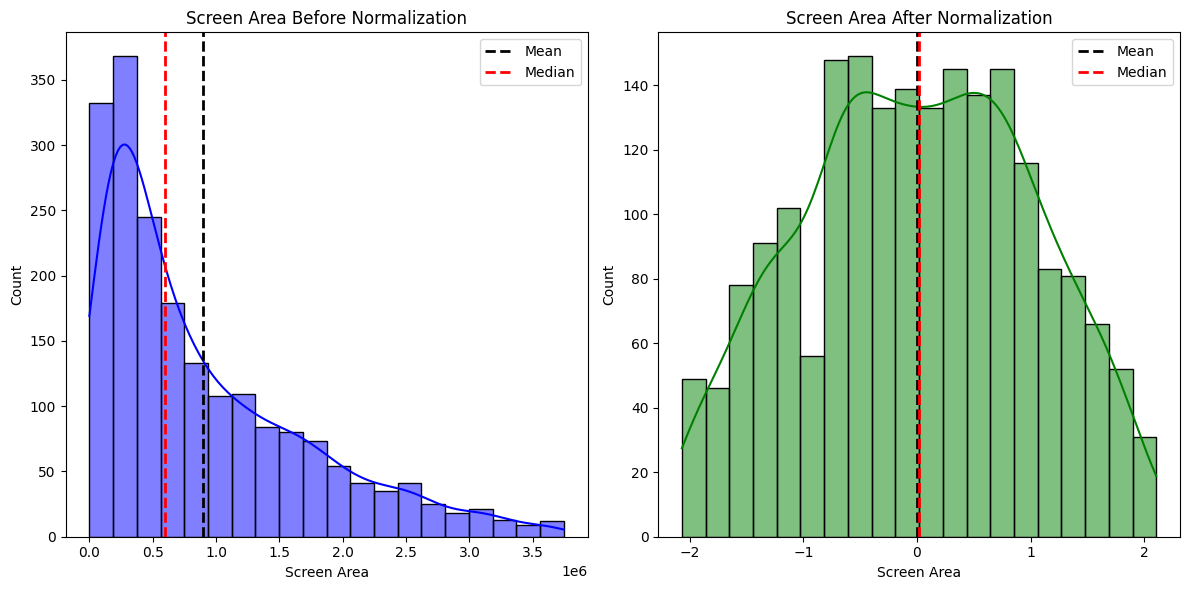

In [539]:
plt.figure(figsize=(12, 6))

# Subplot 1: Before Normalization
plt.subplot(1, 2, 1)
sns.histplot(original_px_area, bins=20, kde=True, color='blue')
plt.axvline(original_px_area.mean(), color='black', linestyle='dashed', linewidth=2, label='Mean')  # Mean line
plt.axvline(original_px_area.median(), color='red', linestyle='dashed', linewidth=2, label='Median')  # Median line
plt.title('Screen Area Before Normalization')
plt.xlabel('Screen Area')
plt.ylabel('Count')
plt.legend()

# Subplot 2: After Normalization
plt.subplot(1, 2, 2)
sns.histplot(X['screen_area'], bins=20, kde=True, color='green')
plt.axvline(X['screen_area'].mean(), color='black', linestyle='dashed', linewidth=2, label='Mean')  # Mean line
plt.axvline(X['screen_area'].median(), color='red', linestyle='dashed', linewidth=2, label='Median')  # Median line
plt.title('Screen Area After Normalization')
plt.xlabel('Screen Area')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()


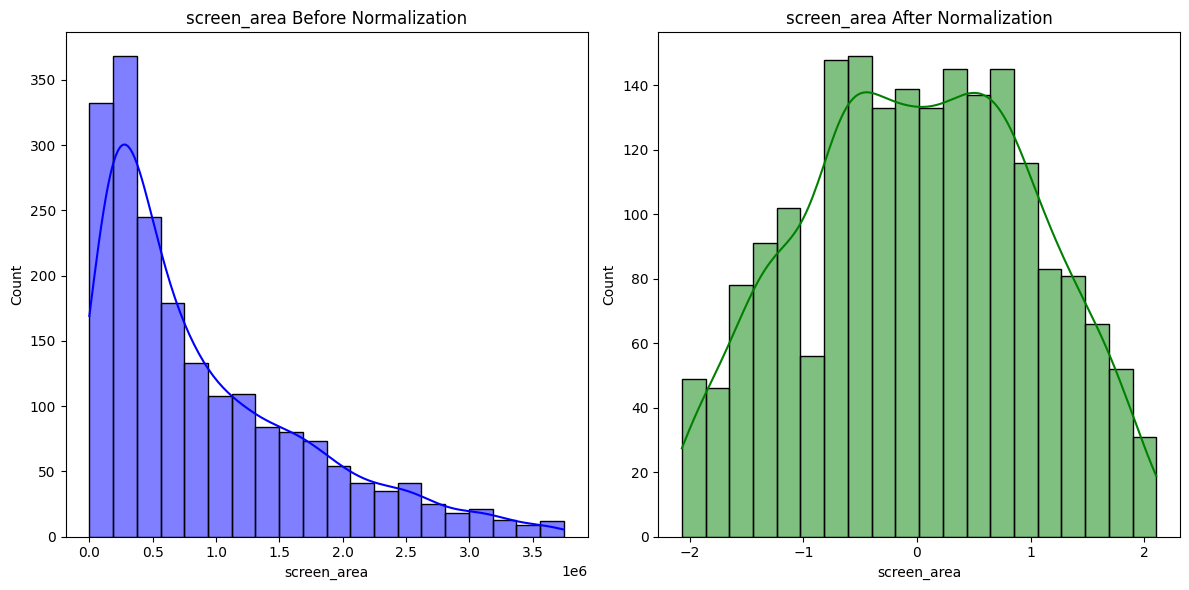

In [540]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(original_px_area, bins=20, kde=True, color='blue')
ax.axvline(X[col].mean(), color = 'black',linestyle='dashed', linewidth=2) 
ax.axvline(X[col].median(), color = 'red',linestyle='dashed', linewidth=2) 
plt.title('screen_area Before Normalization')
plt.xlabel('screen_area')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(X['screen_area'], bins=20, kde=True, color='green')
ax.axvline(X[col].mean(), color = 'black',linestyle='dashed', linewidth=2) 
ax.axvline(X[col].median(), color = 'red',linestyle='dashed', linewidth=2) 
plt.title('screen_area After Normalization')
plt.xlabel('screen_area')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Test Tain Split

In [541]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1584, 7)
(396, 7)
(1584,)
(396,)


In [542]:
# Define the pipeline with StandardScaler
pipeline = Pipeline([
    ('scaler', StandardScaler()) 
])
# Transform the training and test data
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

### STE-10:TRAIN THE MODEL 

In [543]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier(eval_metric='mlogloss'),
    'Voting Classifier':VotingClassifier(estimators=[
    ('knn', KNeighborsClassifier()),
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('xgboost', XGBClassifier(eval_metric='mlogloss'))
], voting='soft') 
}

##### NOW WE USE THE FOR LOOP TO ITERATE OVER MODELS 

In [544]:
results = []
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)

    y_pred_test = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train, average='weighted')
    recall_train = recall_score(y_train, y_pred_train, average='weighted')
    f1_train = f1_score(y_train, y_pred_train, average='weighted')

    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')
    f1_test = f1_score(y_test, y_pred_test, average='weighted')

    results.append({
        'Model': model_name,
        'Accuracy Train': accuracy_train,
        'Accuracy Test': accuracy_test,
        'Precision Train': precision_train,
        'Precision Test': precision_test,
        'Recall Train': recall_train,
        'Recall Test': recall_test,
        'F1-Score Train': f1_train,
        'F1-Score Test': f1_test,
        'y_pred Test': y_pred_test  
    })

results_df = pd.DataFrame(results)
print("Results for `price_range` prediction:\n")
results_df


Results for `price_range` prediction:



,Model,Accuracy Train,Accuracy Test,Precision Train,Precision Test,Recall Train,Recall Test,F1-Score Train,F1-Score Test,y_pred Test
0,Logistic Regression,0.946338,0.944444,0.946463,0.944482,0.946338,0.944444,0.946375,0.944344,"[2, 0, 0, 3, 1, 0, 3, 2, 1, 3, 2, 1, 0, 2, 0, ..."
1,KNN,0.857955,0.722222,0.860849,0.740102,0.857955,0.722222,0.858760,0.727877,"[2, 0, 0, 2, 0, 0, 3, 1, 1, 3, 2, 0, 0, 1, 0, ..."
2,Random Forest,1.000000,0.888889,1.000000,0.889817,1.000000,0.888889,1.000000,0.888485,"[3, 0, 0, 3, 1, 0, 3, 2, 1, 3, 2, 1, 0, 2, 0, ..."
3,Decision Tree,1.000000,0.863636,1.000000,0.866073,1.000000,0.863636,1.000000,0.864455,"[3, 0, 0, 3, 1, 0, 3, 2, 1, 3, 2, 1, 0, 2, 0, ..."
4,SVM,0.954545,0.906566,0.954949,0.908413,0.954545,0.906566,0.954638,0.906961,"[3, 0, 0, 3, 1, 0, 3, 2, 1, 3, 2, 0, 0, 2, 0, ..."
5,XGBoost,1.000000,0.916667,1.000000,0.916805,1.000000,0.916667,1.000000,0.916351,"[3, 0, 0, 3, 1, 0, 3, 2, 1, 3, 2, 1, 0, 2, 0, ..."
6,Voting Classifier,1.000000,0.888889,1.000000,0.889730,1.000000,0.888889,1.000000,0.888948,"[3, 0, 0, 3, 1, 0, 3, 2, 1, 3, 2, 1, 0, 2, 0, ..."


In [545]:
# CREATING A FUNCTION FOR PLOTTING LEARNING CURVE
def plot_learning_curve(model, X_train, y_train, title="Learning Curve", scoring='accuracy', cv=5):

    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    plt.figure(figsize=(4,3))
    plt.plot(train_sizes, train_mean, label="Training Accuracy", color='blue')
    plt.plot(train_sizes, val_mean, label="Validation Accuracy", color='red')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='red')
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel(scoring.capitalize())
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()


Plotting the learning curve for mode Logistic Regression


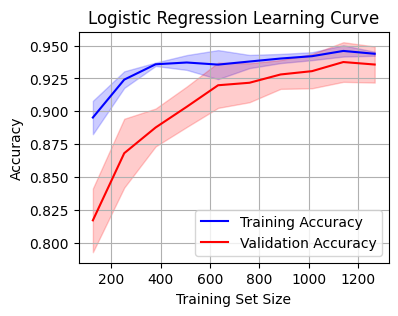

Plotting the learning curve for mode KNN


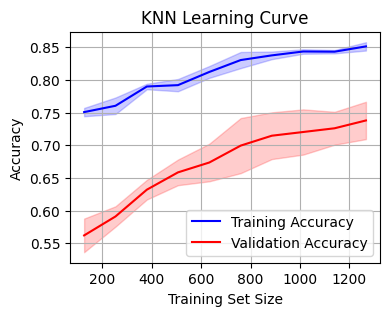

Plotting the learning curve for mode Random Forest


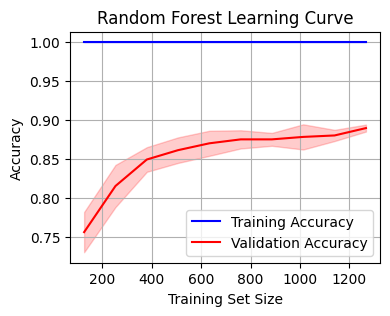

Plotting the learning curve for mode Decision Tree


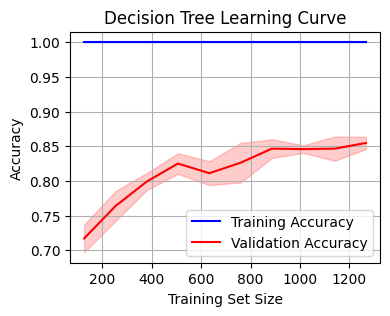

Plotting the learning curve for mode SVM


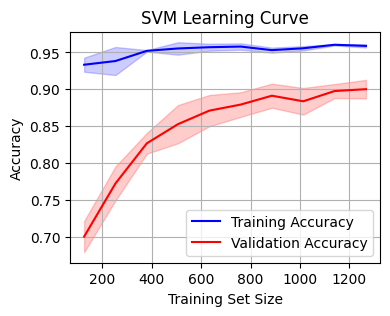

Plotting the learning curve for mode XGBoost


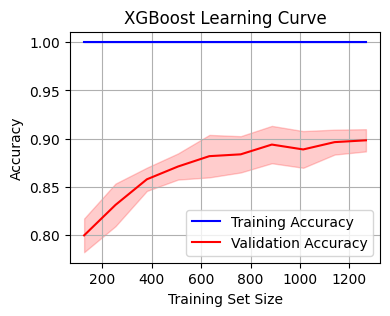

Plotting the learning curve for mode Voting Classifier


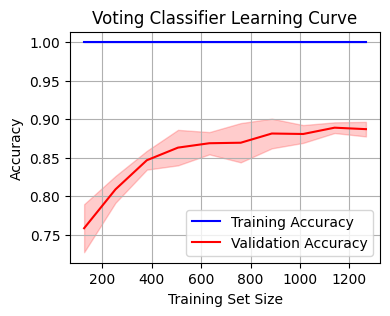

In [546]:
for model_name, model in models.items():
    print(f"Plotting the learning curve for mode {model_name}")
    plot_learning_curve(model, X_train_scaled, y_train, title=f"{model_name} Learning Curve")

##### THIS THE DATAFRAME WHERE THE RESULT ARE STORED FOR CORRESPONDING MODELS AND ALSO STORED THE y_pred Test FOR CONFUSION MATRIX

In [547]:
# FOR PLOTTING CONFUSION MATRIX WE MAKE ANOTHER DATAFRAME WITH y_pred Test AND CORRESPONDING MODES
result_copy=results_df[['Model','y_pred Test']]
result_copy

,Model,y_pred Test
0,Logistic Regression,"[2, 0, 0, 3, 1, 0, 3, 2, 1, 3, 2, 1, 0, 2, 0, ..."
1,KNN,"[2, 0, 0, 2, 0, 0, 3, 1, 1, 3, 2, 0, 0, 1, 0, ..."
2,Random Forest,"[3, 0, 0, 3, 1, 0, 3, 2, 1, 3, 2, 1, 0, 2, 0, ..."
3,Decision Tree,"[3, 0, 0, 3, 1, 0, 3, 2, 1, 3, 2, 1, 0, 2, 0, ..."
4,SVM,"[3, 0, 0, 3, 1, 0, 3, 2, 1, 3, 2, 0, 0, 2, 0, ..."
5,XGBoost,"[3, 0, 0, 3, 1, 0, 3, 2, 1, 3, 2, 1, 0, 2, 0, ..."
6,Voting Classifier,"[3, 0, 0, 3, 1, 0, 3, 2, 1, 3, 2, 1, 0, 2, 0, ..."


##### PLOTTING THE CONFUSION MATRIX FOR DIFFERENT MODELS

The vales of confusion matrix fo the model:Logistic Regression is:
[[106   1   0   0]
 [  4  89   4   0]
 [  0   4  78   4]
 [  0   0   5 101]]

Plot the confusion matrix for Logistic Regression:


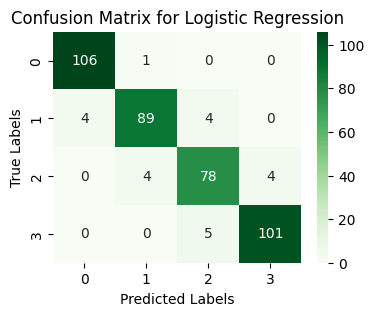

The vales of confusion matrix fo the model:KNN is:
[[90 17  0  0]
 [17 65 15  0]
 [ 0 29 51  6]
 [ 0  0 26 80]]

Plot the confusion matrix for KNN:


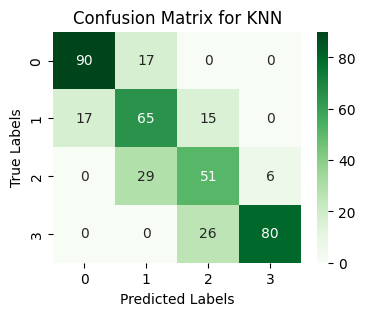

The vales of confusion matrix fo the model:Random Forest is:
[[104   3   0   0]
 [ 10  77  10   0]
 [  0   9  73   4]
 [  0   0   8  98]]

Plot the confusion matrix for Random Forest:


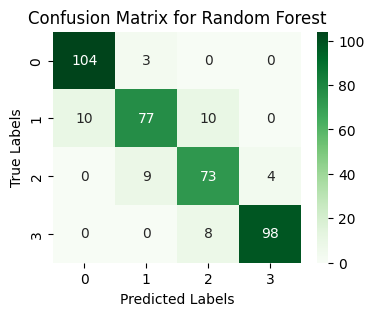

The vales of confusion matrix fo the model:Decision Tree is:
[[101   6   0   0]
 [  8  79  10   0]
 [  0  13  68   5]
 [  0   0  12  94]]

Plot the confusion matrix for Decision Tree:


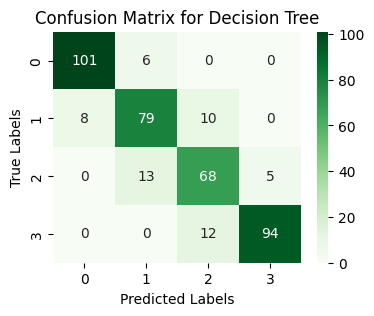

The vales of confusion matrix fo the model:SVM is:
[[103   4   0   0]
 [  7  82   8   0]
 [  0   8  76   2]
 [  0   0   8  98]]

Plot the confusion matrix for SVM:


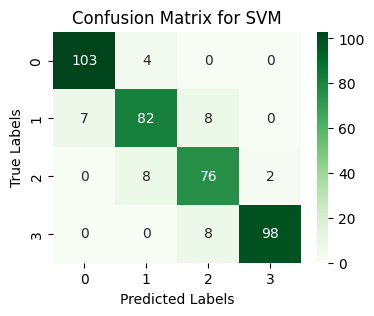

The vales of confusion matrix fo the model:XGBoost is:
[[104   3   0   0]
 [  8  83   6   0]
 [  0   5  76   5]
 [  0   0   6 100]]

Plot the confusion matrix for XGBoost:


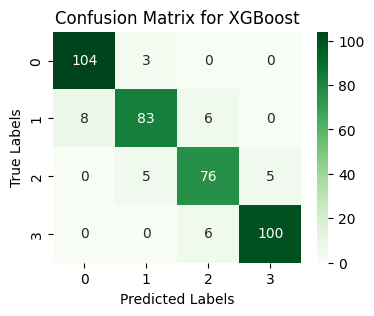

The vales of confusion matrix fo the model:Voting Classifier is:
[[103   4   0   0]
 [  8  80   9   0]
 [  0   9  72   5]
 [  0   0   9  97]]

Plot the confusion matrix for Voting Classifier:


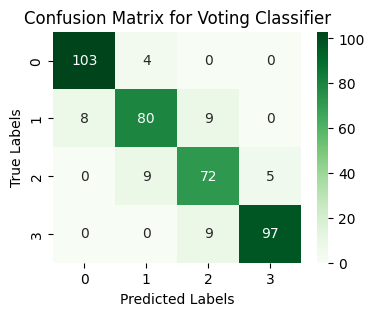

In [548]:
# ACCESSING THE MODELS AND CORRESPONDING y_pred Test VALUE BY USING FOR LOOP 
for idx,row in result_copy.iterrows():
    model_name = row['Model']
    y_pred = row['y_pred Test']

    cm = confusion_matrix(y_test, y_pred)

    # PLOTTING
    print(f"The vales of confusion matrix fo the model:{model_name} is:\n{cm}\n")
    print(f"Plot the confusion matrix for {model_name}:")
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


### STEP-11:HYPERPARAMETER TUNING USING GridSearchCV

In [ ]:
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'saga'],
        'penalty': ['l1', 'l2'],
        'max_iter': [500, 1000]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20],
        'criterion': ['gini', 'entropy']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale']
    },
    'XGBoost': {
        'learning_rate': [0.05, 0.1],
        'n_estimators': [100, 200],
        'max_depth': [3, 6]
    },
    'Voting Classifier': {
        'weights': [[1, 1, 1, 1], [2, 1, 1, 1], [1, 2, 1, 1]], 
        'xgboost__learning_rate': [0.05, 0.1],
        'xgboost__n_estimators': [50, 100],
        'rf__n_estimators': [100, 200], 
        'rf__max_depth': [None, 10]
    }
}


In [550]:
results_tuned = []

for model_name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()), 
        ('classifier', model)         
    ])
    
    param_grid = {
        f'classifier__{key}': value for key, value in param_grids[model_name].items()
    }
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1,error_score='raise')
 
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    best_pipeline = grid_search.best_estimator_
    best_model = best_pipeline.named_steps['classifier']

    y_train_pred = best_pipeline.predict(X_train)  
    y_test_pred = best_pipeline.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train= f1_score(y_train, y_train_pred, average='weighted')

    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test= precision_score(y_test, y_test_pred, average='weighted')
    recall_test= recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    results_tuned.append({
        'Model': model_name,
        'Best Parameters': best_params,
        'Best Model(tuning)': best_model,
        'Best Score': best_score,
    
        'Accuracy Train(tuning)': accuracy_train,
        'Precision Train(tuning)': precision_train,
        'Recall Train(tuning)': recall_train,
        'F1-Score Train(tuning)': f1_train,  

        'Accuracy Test(tuning)': accuracy_test,
        'Precision Test(tuning)': precision_test,
        'Recall Test(tuning)': recall_test,
        'F1-Score Test(tuning)': f1_test,
        'y_pred Test': y_test_pred,
        'Best Model(tuning)': best_model
    })

results_df_tuned = pd.DataFrame(results_tuned)




Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [551]:
print("Results for Hyperparameter Tuning and Cross-Validation:")
results_df_tuned

Results for Hyperparameter Tuning and Cross-Validation:


,Model,Best Parameters,Best Model(tuning),Best Score,Accuracy Train(tuning),Precision Train(tuning),Recall Train(tuning),F1-Score Train(tuning),Accuracy Test(tuning),Precision Test(tuning),Recall Test(tuning),F1-Score Test(tuning),y_pred Test
0,Logistic Regression,"{'classifier__C': 10, 'classifier__max_iter': ...","LogisticRegression(C=10, max_iter=500, penalty...",0.936871,0.945707,0.945753,0.945707,0.945722,0.949495,0.949200,0.949495,0.949285,"[3, 0, 0, 3, 1, 0, 3, 2, 1, 3, 2, 1, 0, 2, 0, ..."
1,KNN,"{'classifier__n_neighbors': 7, 'classifier__p'...","KNeighborsClassifier(n_neighbors=7, p=1)",0.773977,0.859217,0.861501,0.859217,0.859610,0.762626,0.779007,0.762626,0.766970,"[2, 0, 0, 2, 0, 0, 3, 2, 1, 3, 2, 0, 0, 1, 0, ..."
2,Random Forest,"{'classifier__max_depth': None, 'classifier__m...","(DecisionTreeClassifier(max_features='sqrt', r...",0.892054,1.000000,1.000000,1.000000,1.000000,0.886364,0.887544,0.886364,0.886251,"[3, 0, 0, 3, 1, 0, 3, 2, 1, 3, 2, 1, 0, 2, 0, ..."
3,Decision Tree,"{'classifier__criterion': 'gini', 'classifier_...",DecisionTreeClassifier(),0.851641,1.000000,1.000000,1.000000,1.000000,0.876263,0.876300,0.876263,0.876093,"[3, 0, 0, 3, 1, 0, 3, 2, 1, 3, 2, 1, 0, 2, 0, ..."
4,SVM,"{'classifier__C': 10, 'classifier__gamma': 'sc...","SVC(C=10, kernel='linear', probability=True)",0.934982,0.947601,0.947709,0.947601,0.947618,0.952020,0.951764,0.952020,0.951783,"[2, 0, 0, 3, 1, 0, 3, 2, 1, 3, 2, 1, 0, 2, 0, ..."
5,XGBoost,"{'classifier__learning_rate': 0.1, 'classifier...","XGBClassifier(base_score=None, booster=None, c...",0.897740,0.996212,0.996219,0.996212,0.996210,0.919192,0.919612,0.919192,0.918993,"[3, 0, 0, 3, 1, 0, 3, 2, 1, 3, 2, 1, 0, 2, 0, ..."
6,Voting Classifier,"{'classifier__rf__max_depth': None, 'classifie...","VotingClassifier(estimators=[('knn', KNeighbor...",0.890786,1.000000,1.000000,1.000000,1.000000,0.891414,0.891741,0.891414,0.891061,"[3, 0, 0, 3, 1, 0, 3, 2, 1, 3, 2, 1, 0, 2, 0, ..."


Learning curve after tuning

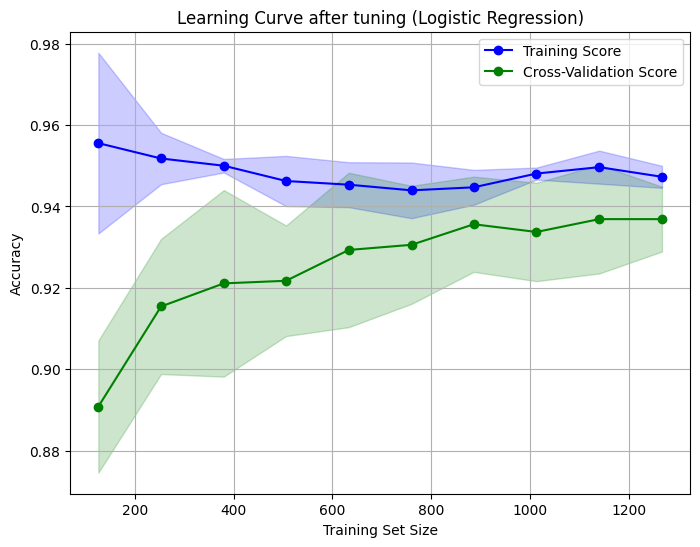

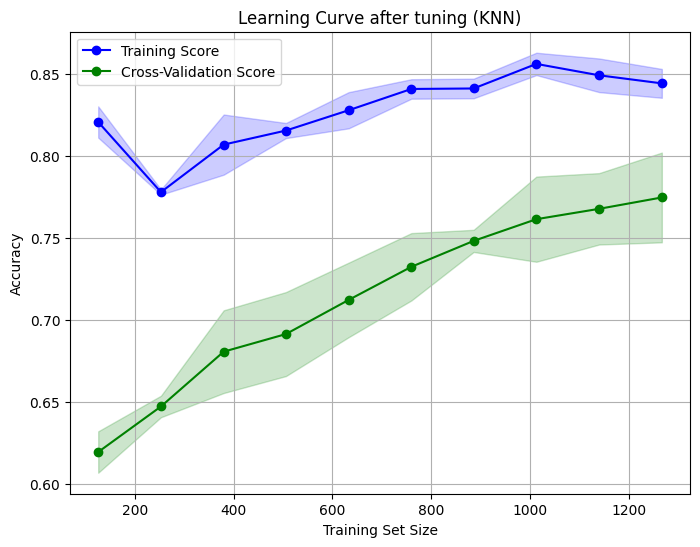

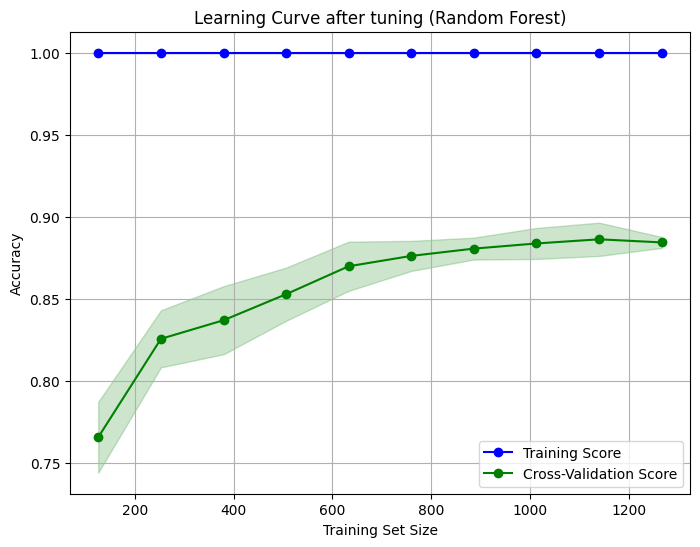

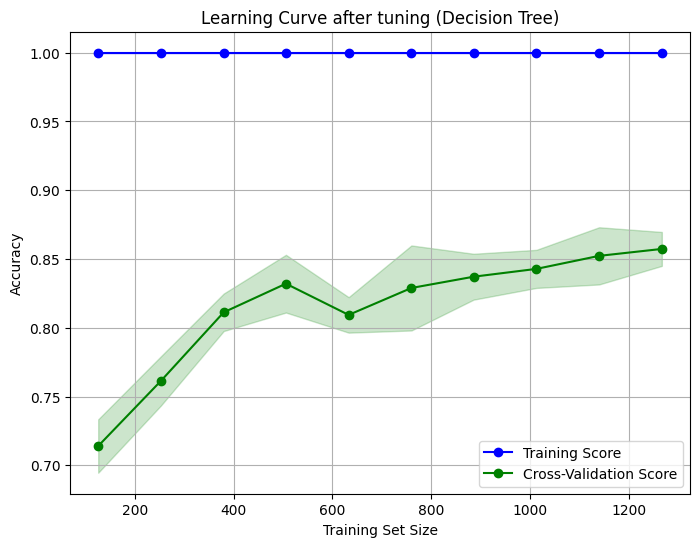

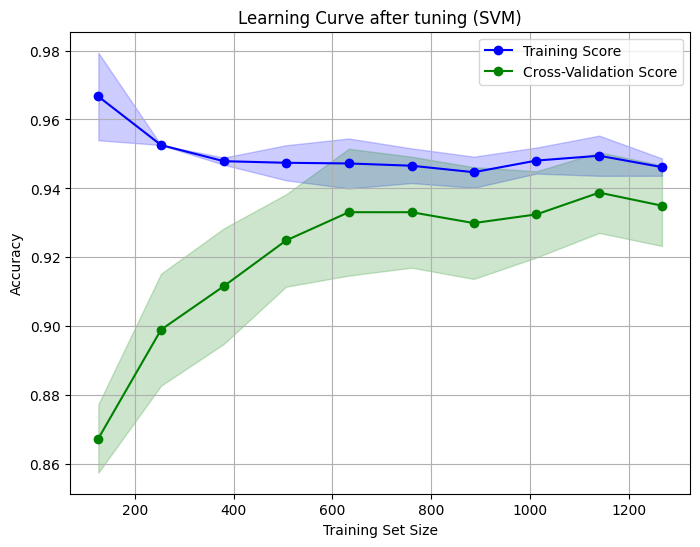

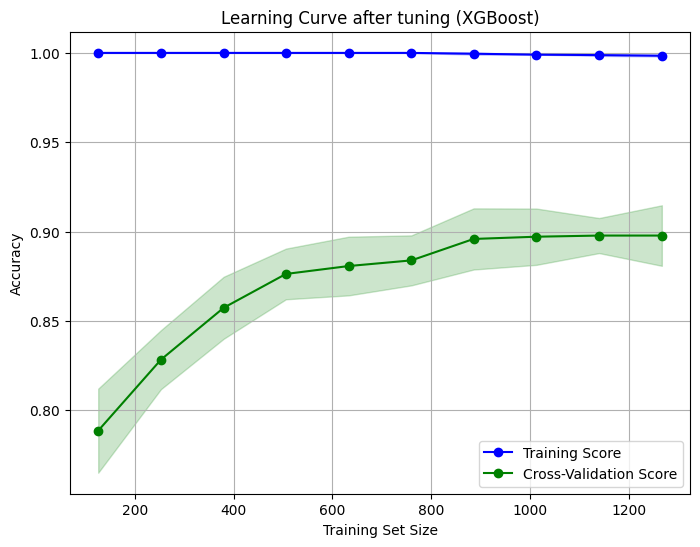

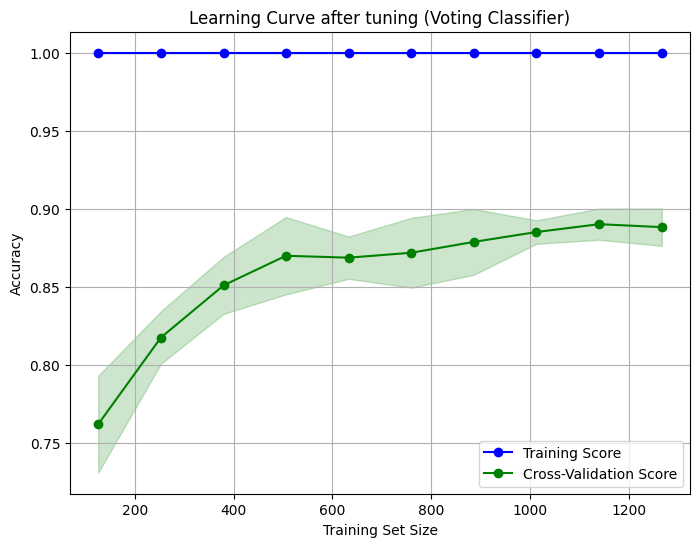

In [553]:
def tuning_learning_curve(results_df, X_train, y_train, metric='Accuracy Test(tuning)', cv=5, scoring='accuracy'):

    if metric not in results_df.columns:
        raise ValueError(f"The metric '{metric}' is not in the DataFrame columns.")

    # Iterate over all models in the results DataFrame
    for _, row in results_df.iterrows():
        model = row['Best Model(tuning)']
        model_name = row['Model']

        # Generate learning curve
        train_sizes, train_scores, test_scores = learning_curve(
            model, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
        )

        # Calculate mean and standard deviation
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        # Plot learning curve
        plt.figure(figsize=(8, 6))
        plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training Score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="green", label="Cross-Validation Score")
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.2, color="blue")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.2, color="green")

        plt.title(f"Learning Curve after tuning ({model_name})")
        plt.xlabel("Training Set Size")
        plt.ylabel(scoring.capitalize())
        plt.legend(loc="best")
        plt.grid()
        plt.show()

# Usage: Call this function to plot learning curves for all models
tuning_learning_curve(results_df_tuned, X_train_scaled, y_train, metric='Accuracy Test(tuning)', cv=5, scoring='accuracy')


In [554]:
results_df_tuned_copy=results_df_tuned[['Model','y_pred Test']]
results_df_tuned_copy

,Model,y_pred Test
0,Logistic Regression,"[3, 0, 0, 3, 1, 0, 3, 2, 1, 3, 2, 1, 0, 2, 0, ..."
1,KNN,"[2, 0, 0, 2, 0, 0, 3, 2, 1, 3, 2, 0, 0, 1, 0, ..."
2,Random Forest,"[3, 0, 0, 3, 1, 0, 3, 2, 1, 3, 2, 1, 0, 2, 0, ..."
3,Decision Tree,"[3, 0, 0, 3, 1, 0, 3, 2, 1, 3, 2, 1, 0, 2, 0, ..."
4,SVM,"[2, 0, 0, 3, 1, 0, 3, 2, 1, 3, 2, 1, 0, 2, 0, ..."
5,XGBoost,"[3, 0, 0, 3, 1, 0, 3, 2, 1, 3, 2, 1, 0, 2, 0, ..."
6,Voting Classifier,"[3, 0, 0, 3, 1, 0, 3, 2, 1, 3, 2, 1, 0, 2, 0, ..."


The vales of confusion matrix fo the model:Logistic Regression is:
[[106   1   0   0]
 [  3  91   3   0]
 [  0   4  77   5]
 [  0   0   4 102]]


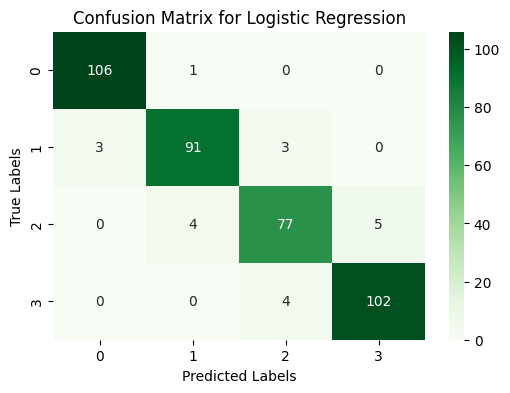

The vales of confusion matrix fo the model:KNN is:
[[96 11  0  0]
 [14 70 13  0]
 [ 0 26 56  4]
 [ 0  0 26 80]]


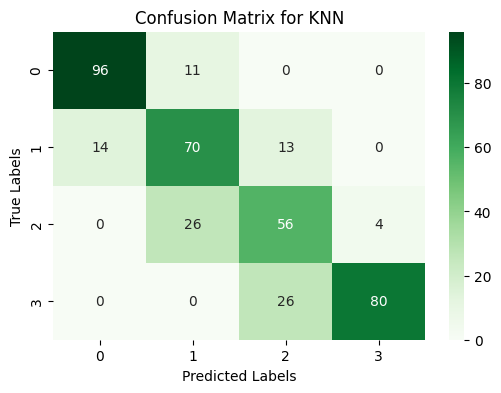

The vales of confusion matrix fo the model:Random Forest is:
[[104   3   0   0]
 [ 10  79   8   0]
 [  0  10  72   4]
 [  0   0  10  96]]


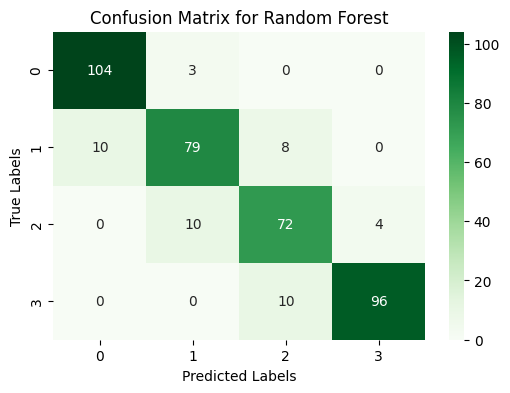

The vales of confusion matrix fo the model:Decision Tree is:
[[103   4   0   0]
 [  8  81   8   0]
 [  0  13  67   6]
 [  0   0  10  96]]


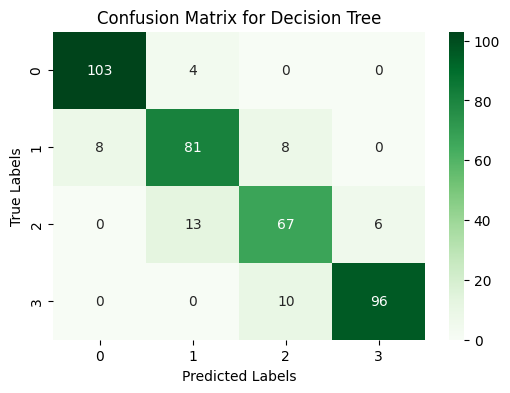

The vales of confusion matrix fo the model:SVM is:
[[106   1   0   0]
 [  4  90   3   0]
 [  0   4  78   4]
 [  0   0   3 103]]


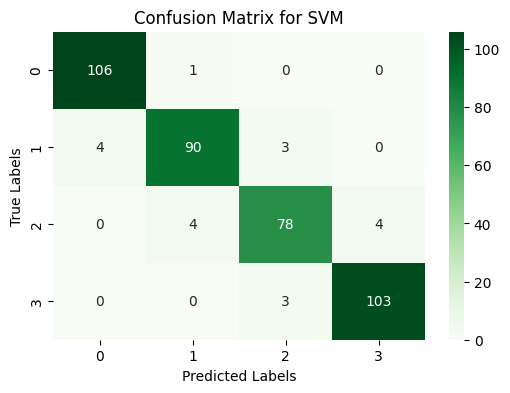

The vales of confusion matrix fo the model:XGBoost is:
[[106   1   0   0]
 [  7  85   5   0]
 [  0   7  75   4]
 [  0   0   8  98]]


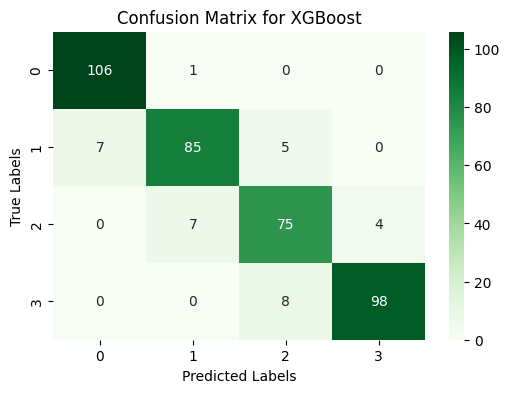

The vales of confusion matrix fo the model:Voting Classifier is:
[[104   3   0   0]
 [ 10  80   7   0]
 [  0   9  72   5]
 [  0   0   9  97]]


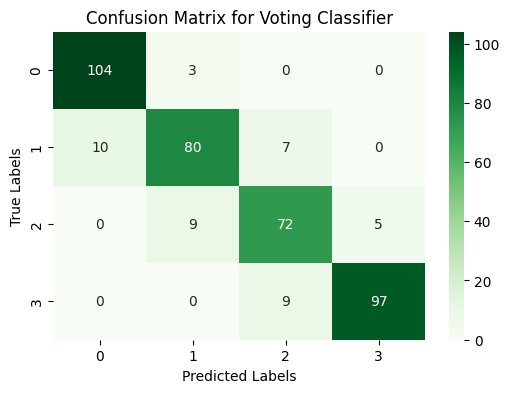

In [555]:
for idx,row in results_df_tuned_copy.iterrows():
    
    model_name = row['Model']
    y_pred = row['y_pred Test']

    cm = confusion_matrix(y_test, y_pred)
    print(f"The vales of confusion matrix fo the model:{model_name} is:\n{cm}")
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


#### VISULALIZATION THE RESULT

In [556]:
def plot_precision_recall_curve(model, X_test_scaled, y_test, n_classes=4):
    
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
    
    y_prob = model.predict_proba(X_test_scaled)
    
    plt.figure(figsize=(6, 4))
    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
        ap_score = average_precision_score(y_test_bin[:, i], y_prob[:, i])
        plt.plot(recall, precision, lw=2, label=f'Class {i} (AP = {ap_score:.2f})')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Multiclass Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()


In [557]:


def plot_roc_curve(model, X_test_scaled, y_test, n_classes=4):

    y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
    y_prob = model.predict_proba(X_test_scaled)

    plt.figure(figsize=(6, 4))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multiclass Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.show()


THE ROC-AUC CURVE FOR LogisticRegression(max_iter=1000)



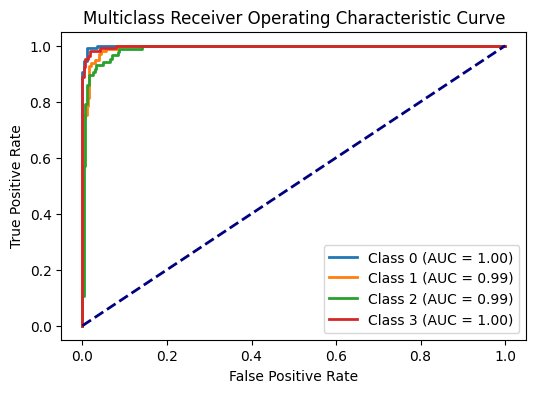



PLOTING THE PRECISION -RECALL CURVE FOR MODEL LogisticRegression(max_iter=1000)



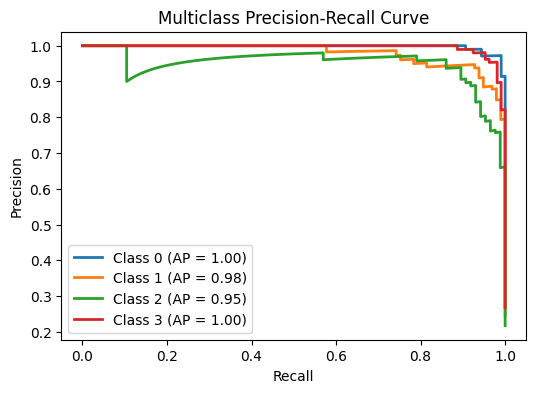

THE ROC-AUC CURVE FOR KNeighborsClassifier()



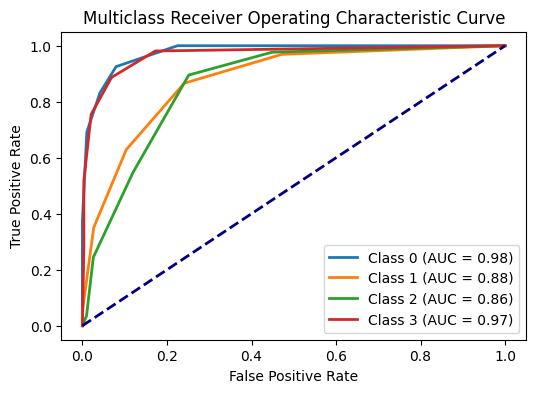



PLOTING THE PRECISION -RECALL CURVE FOR MODEL KNeighborsClassifier()



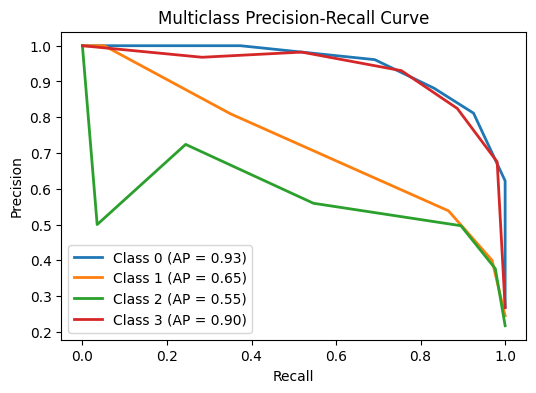

THE ROC-AUC CURVE FOR RandomForestClassifier()



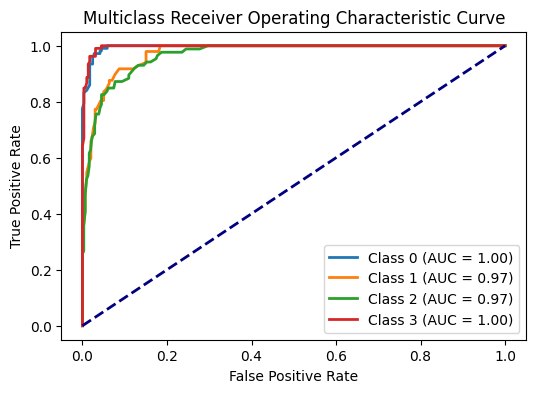



PLOTING THE PRECISION -RECALL CURVE FOR MODEL RandomForestClassifier()



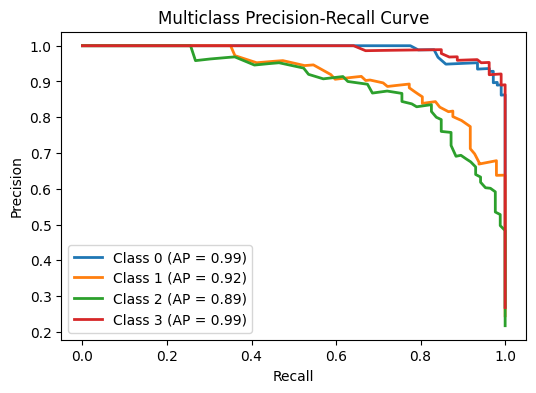

THE ROC-AUC CURVE FOR DecisionTreeClassifier()



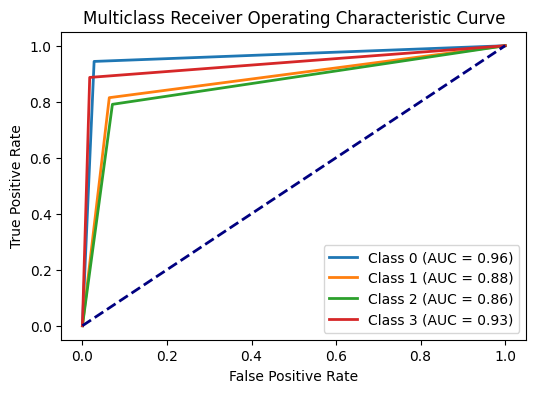



PLOTING THE PRECISION -RECALL CURVE FOR MODEL DecisionTreeClassifier()



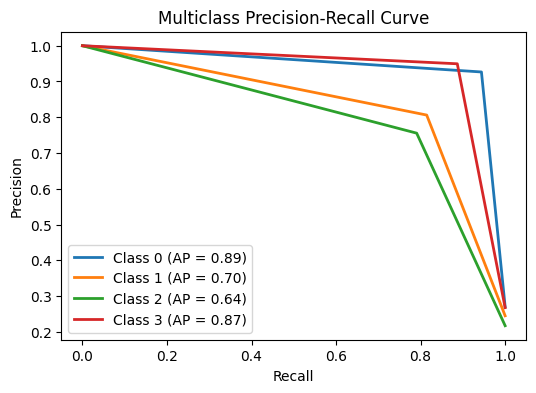

THE ROC-AUC CURVE FOR SVC(probability=True)



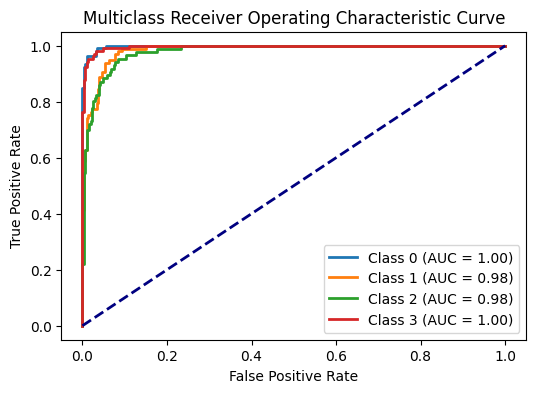



PLOTING THE PRECISION -RECALL CURVE FOR MODEL SVC(probability=True)



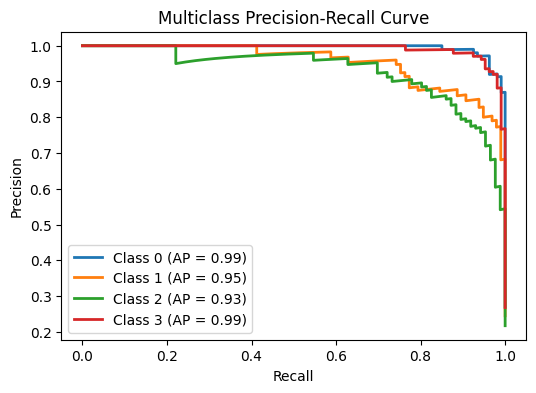

THE ROC-AUC CURVE FOR XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)



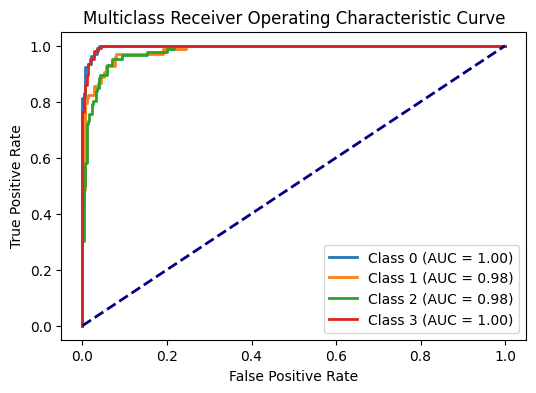



PLOTING THE PRECISION -RECALL CURVE FOR MODEL XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)



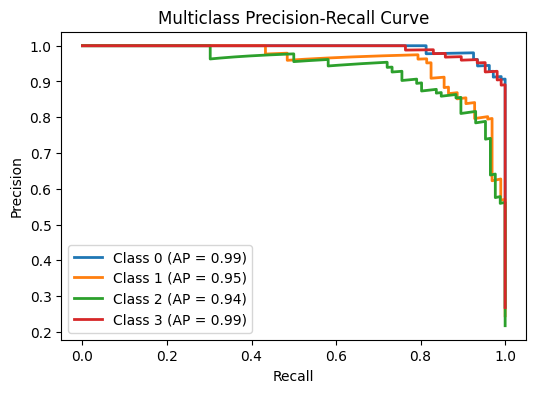

THE ROC-AUC CURVE FOR VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier()),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            fea...
                                            importance_type=None,
                                            interaction_constraints=None

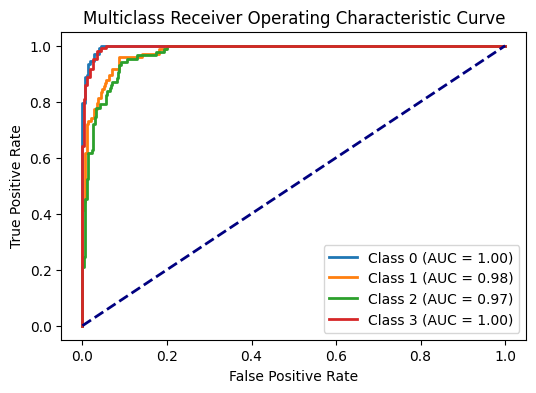



PLOTING THE PRECISION -RECALL CURVE FOR MODEL VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier()),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            fea...
                                            importance_type=None,
                                            in

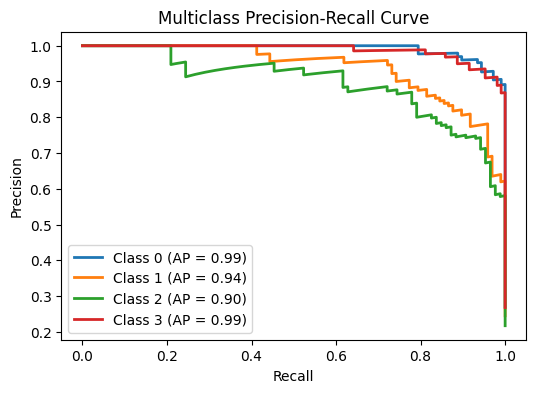

In [558]:
for model_name, model in models.items():    
    print(f"THE ROC-AUC CURVE FOR {model}\n")
    plot_roc_curve(model, X_test_scaled, y_test)
    print("\n")
    print(f"PLOTING THE PRECISION -RECALL CURVE FOR MODEL {model}\n")
    plot_precision_recall_curve(model, X_test_scaled, y_test)


### FEATURE IMPORTANCE

In [572]:
logistic_model = results_df_tuned.iloc[0,2]
logistic_model

LogisticRegression(C=10, max_iter=500, penalty='l1', solver='saga')

##### LOGISTIC REGRESSION:-

In [573]:
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])]
logistic_model.fit(X_train_scaled, y_train)

feature_importance_logistic = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(logistic_model.coef_[0]) 
}).sort_values(by='Importance', ascending=False)

print("Logistic Regression Feature Importance:")
print(feature_importance_logistic)


Logistic Regression Feature Importance:
         Feature  Importance
4            ram   30.780136
5        px_area    7.617205
0  battery_power    7.521224
2      mobile_wt    1.213696
1     int_memory    0.284182
6    screen_area    0.026860
3        n_cores    0.005479


THE COMPARISON OF THE FEATURE IMPORTANCE:



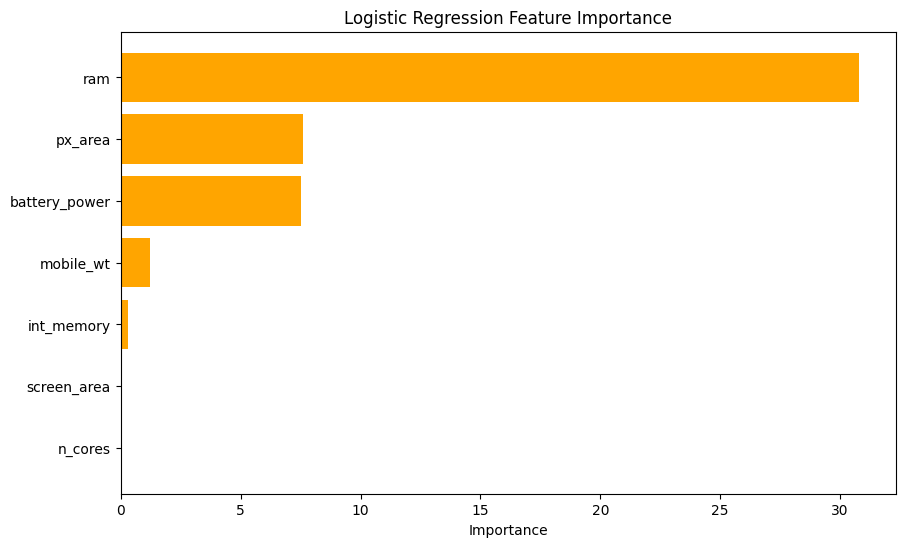

In [574]:
print("THE COMPARISON OF THE FEATURE IMPORTANCE:\n")
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_logistic['Feature'], feature_importance_logistic['Importance'], color='orange')
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()